# Application of Data Analysis in Stock Market

## Authors: Wanlin Xin & Yunhan Jiang
## Team: World Peace

# 1. Executive Summary
This project uses ARIMA and LSTM models to forecast long-term stock prices, aiming to support investment decisions with clear insights into market trends.

### 1.1. Decisions to be Impacted
The system affects investor choices by providing reliable long-term forecasts. ARIMA models offer clear trend and cycle analysis, while RNN variants (e.g., LSTM, GRU) capture complex non-linear patterns to handle irregular market swings. Key areas include:
- **Trading Timing:** Long-term forecasts highlight optimal entry and exit points.
- **Risk Management:** Monitoring trends and cycles provides quantitative suppotfolio risk control.
- **Investment Strategy:** Data-driven insights improve overall financial planning and resource allocation.

### 1.2. Business Value
Accurate forecasts deliver several benefits:
- **Optimized Decisions:** Improved trend analysis reduces errors and losses.
- **Lower Operational Risks:** Early anomaly detection enables proactive risk management.
- **Competitive Edge:** Enhanced forecasting expertise builds a technological advantage.
- **Sustainable Growth:** Better planning and risk control support long-term market stability

### 1.3. Motivation
This project strengthens the team's data analysis skills and aligns with our interest in finance. It provides valuable experience in predictive analytics while contributing to wise investment strategies and economic stability.

### 1.4. Data Assets
The project is supported by solid historical stock market data:
- **Historical Trading Data:** Sourced from Yahoo Finance for the Dow Jones Industrial Average (^DJI). The training data covers August 2008 to July 2016, and the test data spans July 2016 to June 2018. Key metrics include opening, closing, high, low prices, and trading volume.
- **Data Preprocessing and Feature Engineering:** The raw data is thoroughly checked for missing values and outliers (using the IQR method) and processed to achieve stationarity.
- **Future Expansion:** There are plans to incorporate additional sources such as news sentiment and macroeconomic indicators to further improve forecasting accuracy.

# 2. Data Preprocessing

## 2.1 Extract Data

### 2.1.1. Build Training Set

In [109]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Set the ticker symbol and date range
ticker_symbol = '^DJI'
end_date = datetime.strptime("2016/07/02", "%Y/%m/%d")  # Converts a string to a datetime object
start_date = end_date - timedelta(days=2885)  # Count start date

# Get stock data from Yahoo Finance
stock_data = yf.download(ticker_symbol, start=start_date.strftime("%Y-%m-%d"), end=end_date.strftime("%Y-%m-%d"))

# 2008-08-08 to 2016-07-02
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^DJI']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Adj Close, ^DJI), (Close, ^DJI), (High, ^DJI), (Low, ^DJI), (Open, ^DJI), (Volume, ^DJI)]
Index: []


In [111]:
# Save data as csv file
csv_filename = f"{ticker_symbol}_historical_data.csv"
stock_data.to_csv(csv_filename)

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
import os
print(os.getcwd())  # Gets the current working directory

/Users/xxxxswl/graduate programming/527/2ndpre


In [3]:
# extraction data
file_path = '/Users/xxxxswl/graduate programming/527/2ndpre/^DJI_historical_data-2.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

In [4]:
# View data format
print(df.info())
print(df.head())

# Gets the number of rows of the CSV
num_rows = len(df)
print(f"the number of rows of the CSV：{num_rows}")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2008-08-08 to 2016-07-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1989 non-null   float64
 1   High    1989 non-null   float64
 2   Low     1989 non-null   float64
 3   Open    1989 non-null   float64
 4   Volume  1989 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 93.2 KB
None
                  Close         High          Low         Open     Volume
Date                                                                     
2008-08-08  11734.32031  11759.95996  11388.04004  11432.08984  212830000
2008-08-11  11782.34961  11867.11035  11675.53027  11729.66992  183190000
2008-08-12  11642.46973  11782.34961  11601.51953  11781.70020  173590000
2008-08-13  11532.95996  11633.78027  11453.33984  11632.80957  182550000
2008-08-14  11615.92969  11718.28027  11450.88965  11532.07031  159790000
the number of rows of the CSV：1989


### 2.1.2. Check for Missing Values

In [117]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing value statistics：\n", missing_values)

Missing value statistics：
 Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


### 2.1.3. Build Test Set

In [118]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Set the ticker symbol and date range
ticker_symbol = '^DJI'
end_date = datetime.strptime("2018/07/02", "%Y/%m/%d")  # Converts a string to a datetime object
start_date = end_date - timedelta(days=730)  # Count start date

# Get stock data from Yahoo Finance
stock_data = yf.download(ticker_symbol, start=start_date.strftime("%Y-%m-%d"), end=end_date.strftime("%Y-%m-%d"))

# 2016-07-02 to 2018-07-02
print(stock_data.head())

# Save data as csv file
csv_filename = f"{ticker_symbol}_historical_data_test.csv"
stock_data.to_csv(csv_filename)

[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open     Volume
Ticker              ^DJI          ^DJI          ^DJI          ^DJI       ^DJI
Date                                                                         
2016-07-05  17840.619141  17904.449219  17785.279297  17904.449219  103650000
2016-07-06  17918.619141  17926.910156  17713.449219  17807.470703   93000000
2016-07-07  17895.880859  17984.949219  17816.650391  17924.240234   81570000
2016-07-08  18146.740234  18166.769531  17971.220703  17971.220703   93460000
2016-07-11  18226.929688  18283.900391  18161.529297  18161.529297   80880000


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.getcwd())

file_path = '/Users/xxxxswl/graduate programming/527/2ndpre/^DJI_historical_data_test-2.csv'
df_test = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

print(df_test.info())
print(df_test.head())

num_rows_test = len(df_test)
print(f"the number of rows in csv files：{num_rows_test}")

/Users/xxxxswl/graduate programming/527/2ndpre
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2016-07-05 to 2018-06-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   502 non-null    float64
 1   High    502 non-null    float64
 2   Low     502 non-null    float64
 3   Open    502 non-null    float64
 4   Volume  502 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.5 KB
None
                  Close         High          Low         Open     Volume
Date                                                                     
2016-07-05  17840.61914  17904.44922  17785.27930  17904.44922  103650000
2016-07-06  17918.61914  17926.91016  17713.44922  17807.47070   93000000
2016-07-07  17895.88086  17984.94922  17816.65039  17924.24023   81570000
2016-07-08  18146.74023  18166.76953  17971.22070  17971.22070   93460000
2016-07-11  18226.92969  18283.90039  18161.52930  18161.52930   808800

In [6]:
# Check for missing values
missing_values_test = df_test.isnull().sum()
print("Missing value statistics：\n", missing_values_test)

Missing value statistics：
 Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


## 2.2 Data Visualization

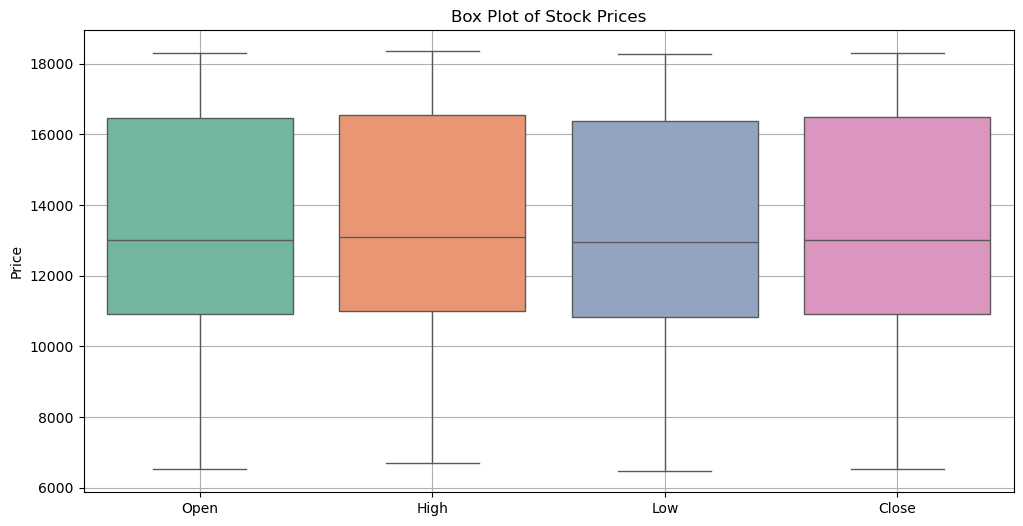

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas.plotting as pd_plotting


# 1. Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']], palette="Set2")
plt.title('Box Plot of Stock Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

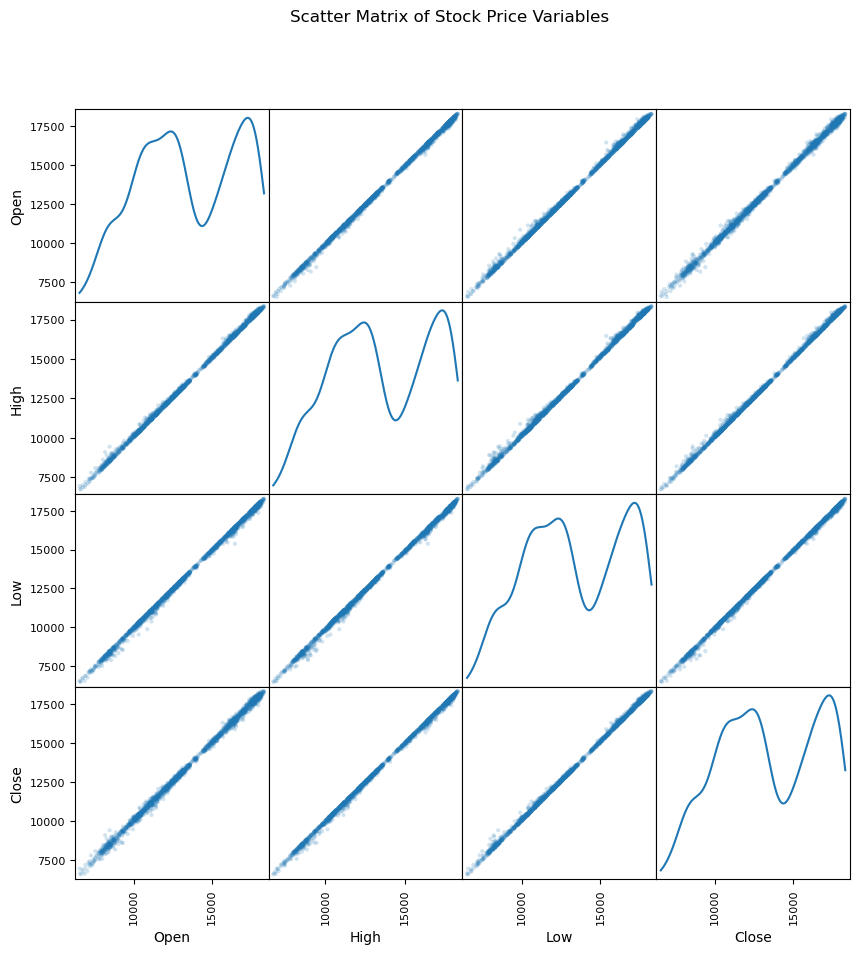

In [122]:
# 2. Scatter Matrix
plt.figure(figsize=(10, 10))
pd_plotting.scatter_matrix(df[['Open', 'High', 'Low', 'Close']], alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.suptitle('Scatter Matrix of Stock Price Variables')
plt.show()

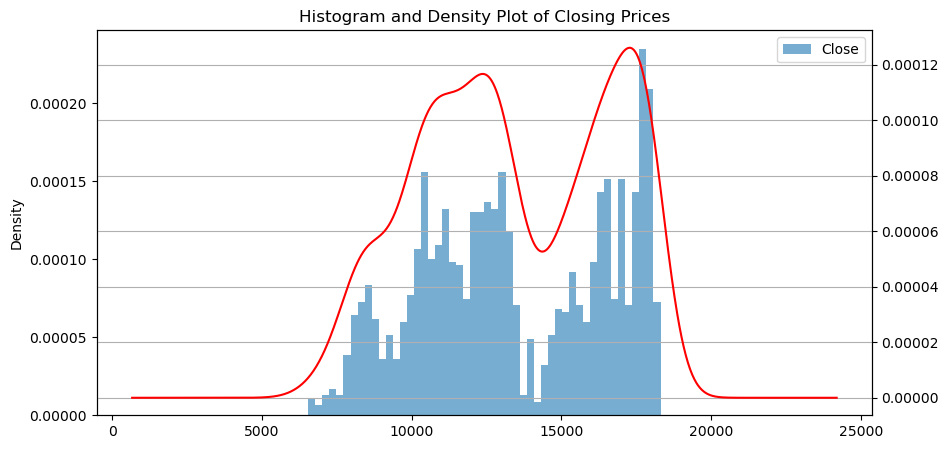

In [123]:
# 3. Histograms and KDE (Density) Plots
df[['Close']].plot(kind='hist', bins=50, alpha=0.6, density=True, figsize=(10, 5), legend=True)
df['Close'].plot(kind='kde', secondary_y=True, color='red')
plt.title('Histogram and Density Plot of Closing Prices')
plt.xlabel('Close Price')
plt.grid(True)
plt.show()

           Open      High       Low     Close
Open   1.000000  0.999592  0.999436  0.998991
High   0.999592  1.000000  0.999373  0.999546
Low    0.999436  0.999373  1.000000  0.999595
Close  0.998991  0.999546  0.999595  1.000000


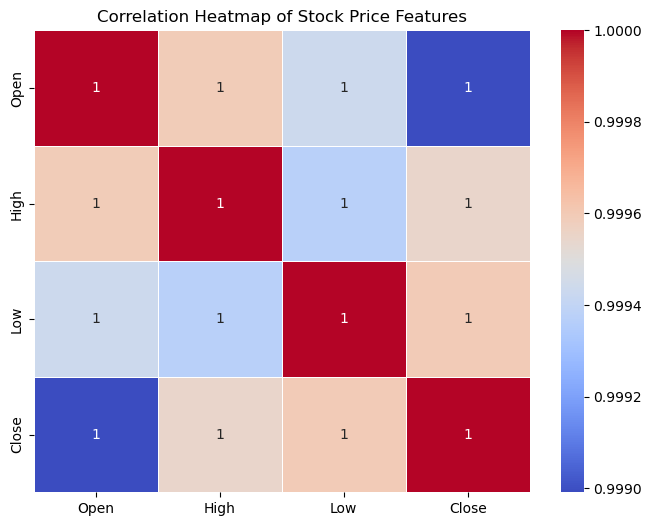

In [124]:
# 4. Heatmap of correlations
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Open', 'High', 'Low', 'Close']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Stock Price Features')
plt.show()

【 Analysis 】
1. Box Plots: It can be seen that the fluctuations of Open, High, Low and Close are similar.
2. Scatter Matrix: The pairwise linear correlation between Open, High, Low and Close is strong.
3. Histogram Density plot: The density curve shows that closing prices are slightly skewed to the right, and there may be some high extremes.
4. Heatmap: You can see that the correlation between Open, High, Low and Close is very strong, close to 1, indicating that they are highly synchronized.

【Inspiration for time series models】

In time series modeling, we usually choose a single variable series for prediction (such as Close price). Since other variables are highly correlated with Close, direct modeling of Close is a feasible and effective strategy from which the model can extract most market price trends.


### 2.2.1. Training Set

【 Reasons for choosing closing price 】

1. As opening prices are often disrupted by sentiment from the previous session, changes in global markets, and breaking news, they are volatile in the initial stages of trading.
2. The closing price is more stable than the opening price, more reflective of the market's full assessment of all information, more representative, and less disruptive to short-term fluctuations.
3. Since the goal of this project is to forecast stock prices for the next two years using 8 years of historical data, it means that we should pay more attention to long-term market trends rather than short-term fluctuations.

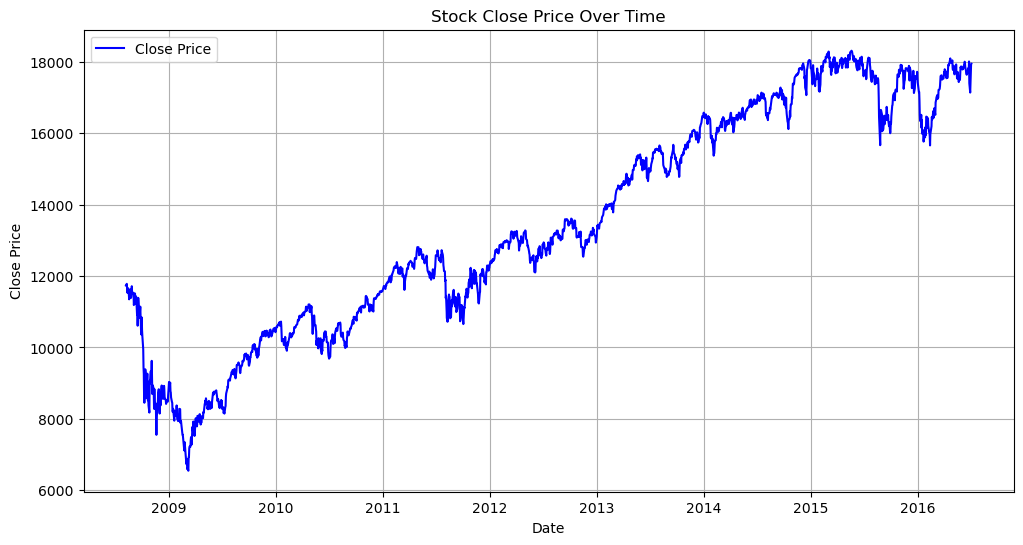

In [125]:
# Make sure the data is sorted chronologically
df.sort_index(inplace=True)

# Plot closing price time series
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Time')
plt.legend()
plt.grid()
plt.show()

### 2.2.2. Test Set

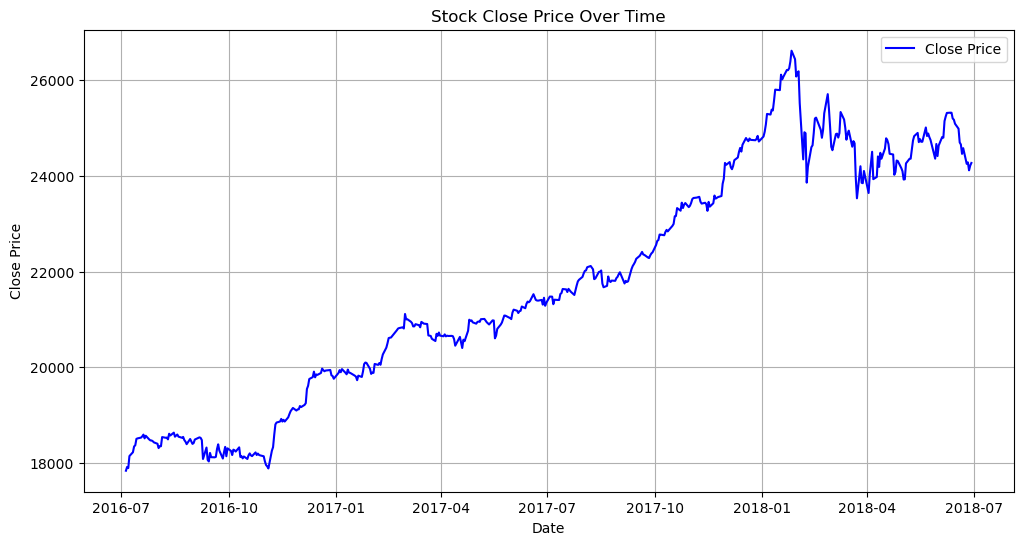

In [126]:
df_test.sort_index(inplace=True)

plt.figure(figsize=(12,6))
plt.plot(df_test['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Time')
plt.legend()
plt.grid()
plt.show()

# 3.Descriptive Analysis

## 3.1 Decomposition

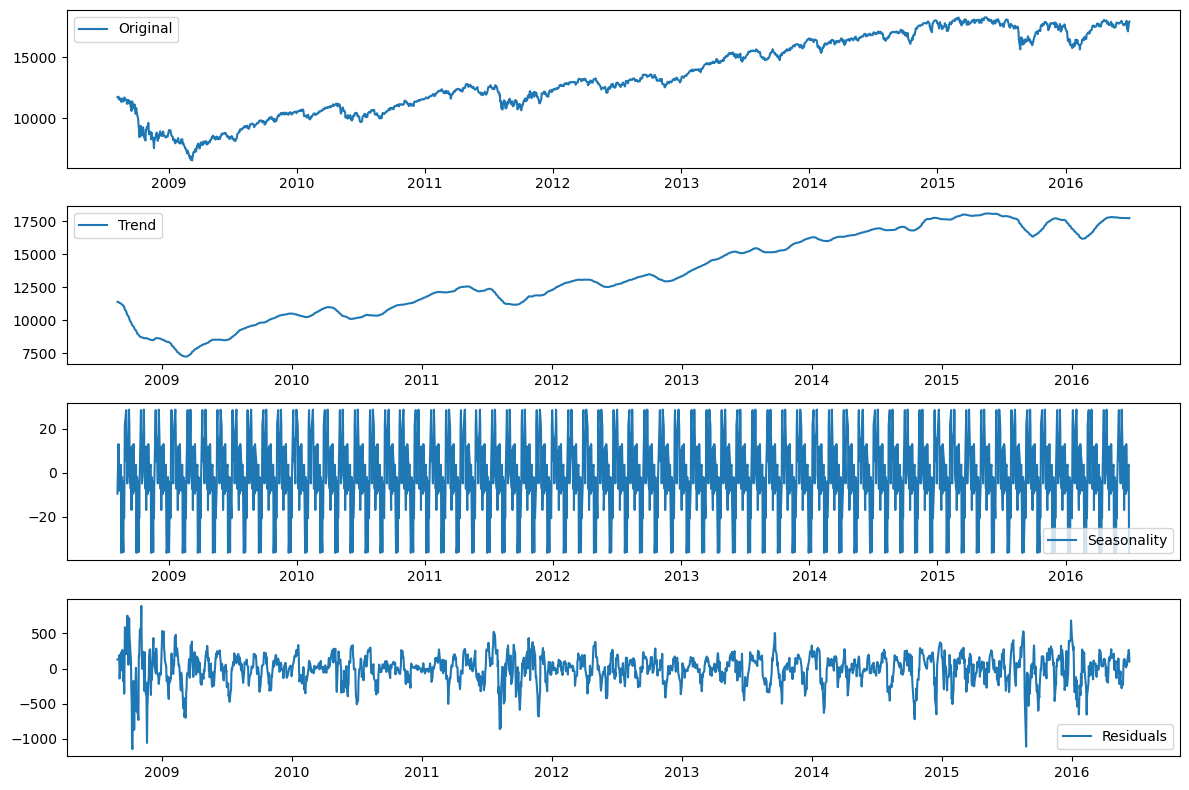

In [127]:
# decomposition for train data set
# Timing decomposition (trend, seasonality, residual analysis)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], model='additive', period=30)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()

1. Trend: There is a clear long-term upward trend in this time series, especially after 2009, and the overall trend is upward. This indicates that the data may be non-stationary, as its mean changes over time. ARIMA requires data stabilization and usually requires Differencing to remove trends.
2. Seasonality: Seasonal components show strong cyclical fluctuations, and the amplitude of fluctuations is relatively stable, indicating that the data may have a fixed cyclical pattern.
3. Residuals: Residuals still contain some large fluctuations, especially around 2008 and 2016, which may be related to unexpected market events or external factors such as the financial crisis.

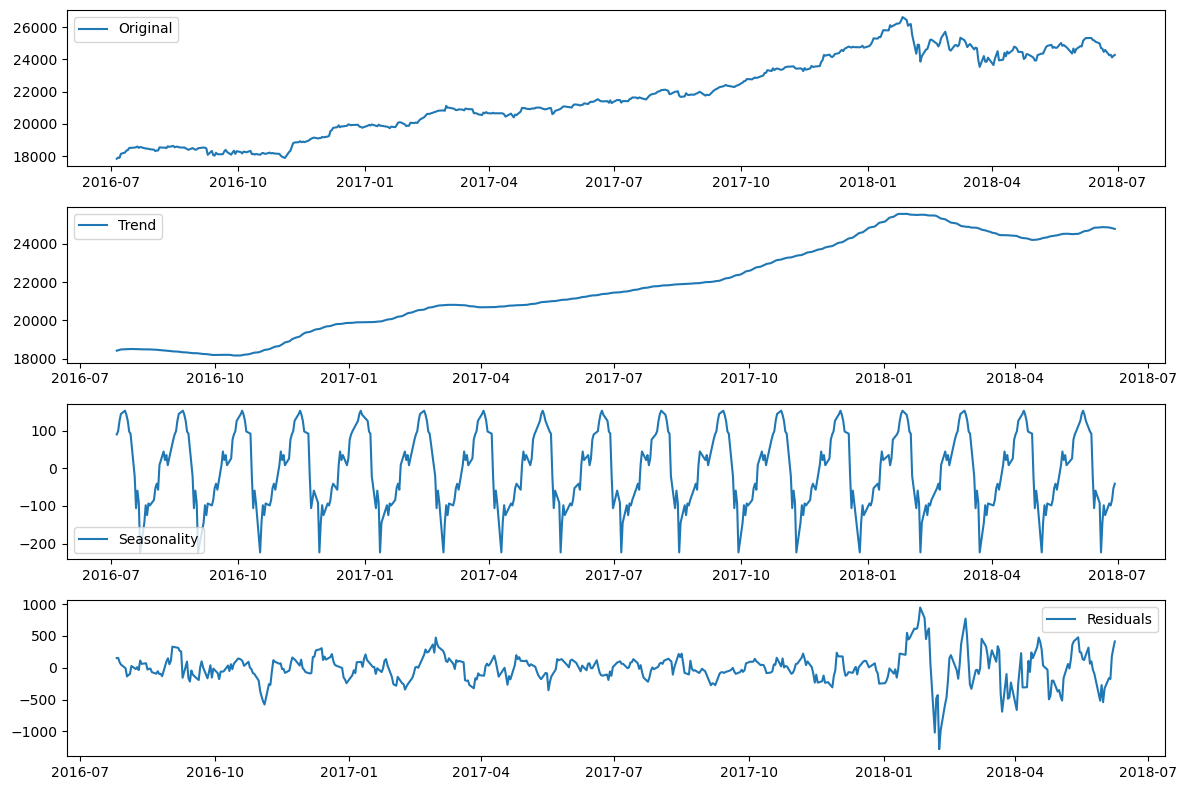

In [128]:
# decomposition for test data set
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_test = seasonal_decompose(df_test['Close'], model='additive', period=30)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_test['Close'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(decomposition_test.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(decomposition_test.seasonal, label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(decomposition_test.resid, label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()

1. Trend: There is a clear long-term upward trend in this time series, especially after July 2017, and the overall trend is upward. This indicates that the data may be non-stationary, as its mean changes over time. ARIMA requires data stabilization and usually requires Differencing to remove trends.
2. Seasonality: Seasonal components show strong cyclical fluctuations, and the amplitude of fluctuations is relatively stable, indicating that the data may have a fixed cyclical pattern.
3. Residuals: Residuals still contain some large fluctuations, especially in February and March 2018, which may be related to unexpected market events or external factors such as the financial crisis.

## 3.2 Stationarity Test (ADF Test)

In [129]:
# Training Set Stationarity Test
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ADF test（Check whether the data is stable)
def adf_test(series):
    result = adfuller(series.dropna())
    print("ADF Test:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] <= 0.05:
        print("Data is stationary (rejects null hypothesis)")
    else:
        print("Data are non-stationary (null hypothesis cannot be rejected）")

print("Raw data ADF test results:")
adf_test(df['Close'])

Raw data ADF test results:
ADF Test:
ADF Statistic: -0.3747127508634969
p-value: 0.9142360001542609
Critical Values:
   1%: -3.4336771595431106
   5%: -2.863009746829746
   10%: -2.5675524325901415
Data are non-stationary (null hypothesis cannot be rejected）


In [130]:
# ADF test is performed after the first difference
df['Close_diff'] = df['Close'].diff()
print("ADF test results after first difference:")
adf_test(df['Close_diff'])

ADF test results after first difference:
ADF Test:
ADF Statistic: -10.116266565551275
p-value: 9.70608644561371e-18
Critical Values:
   1%: -3.4336771595431106
   5%: -2.863009746829746
   10%: -2.5675524325901415
Data is stationary (rejects null hypothesis)


In [131]:
# Test Set Stationarity Test
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print("Raw data ADF test results:")
adf_test(df_test['Close'])

Raw data ADF test results:
ADF Test:
ADF Statistic: -1.1233900119047258
p-value: 0.7056546853271062
Critical Values:
   1%: -3.4435494520411605
   5%: -2.8673612117611267
   10%: -2.5698704830567247
Data are non-stationary (null hypothesis cannot be rejected）


In [132]:
df_test['Close_diff'] = df_test['Close'].diff()
print("ADF test results after first difference:")
adf_test(df_test['Close_diff'])

ADF test results after first difference:
ADF Test:
ADF Statistic: -12.297002076635524
p-value: 7.599233564899748e-23
Critical Values:
   1%: -3.4435494520411605
   5%: -2.8673612117611267
   10%: -2.5698704830567247
Data is stationary (rejects null hypothesis)


## 3.3 ACF & PACF

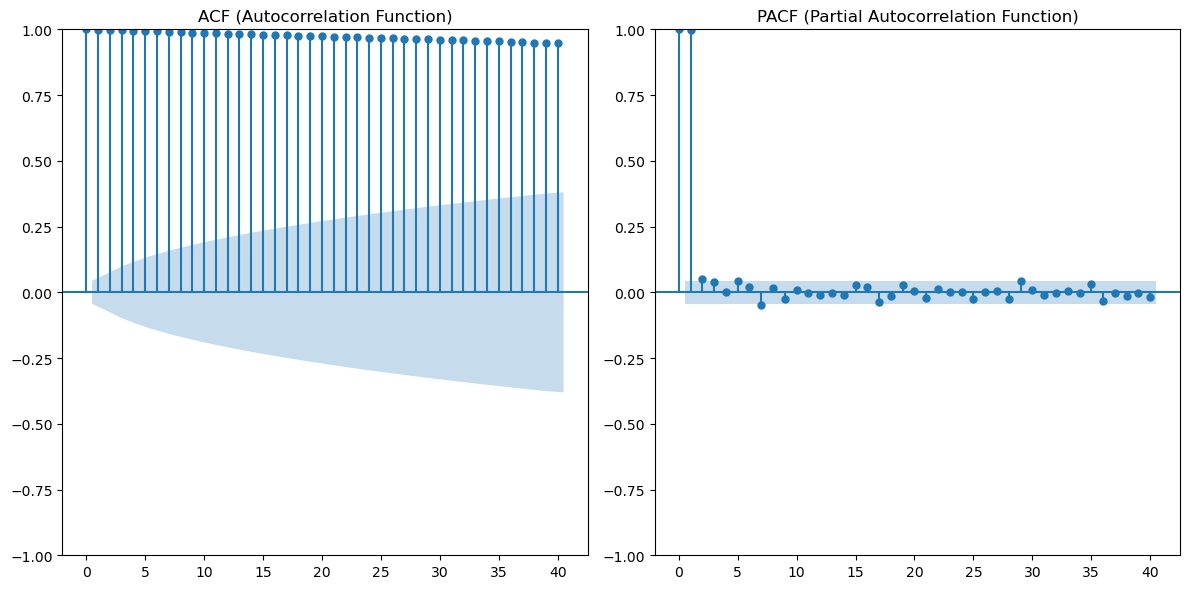

In [133]:
# Draw ACF and PACF diagrams
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Close'].dropna(), lags=40, ax=plt.gca())
plt.title("ACF (Autocorrelation Function)")

plt.subplot(122)
plot_pacf(df['Close'].dropna(), lags=40, ax=plt.gca(), method='ywm')
plt.title("PACF (Partial Autocorrelation Function)")

plt.tight_layout()
plt.show()


【Undifferentiated ACF and PACF】
1. ACF (left) : Has a strong long-term positive correlation and slowly decays as the lag increases, indicating that there is a trend in the original data, that is, the data is non-stationary.
2. PACF (right) : A significant peak at lag 1 followed by a rapid decay indicates that the data may be an AR(1) process, but since ACF is not truncated, the data is still non-stationary.

【 Conclusion 】
Since ACF has a clear long-term correlation, there is a trend in the data that requires at least one difference (d=1).

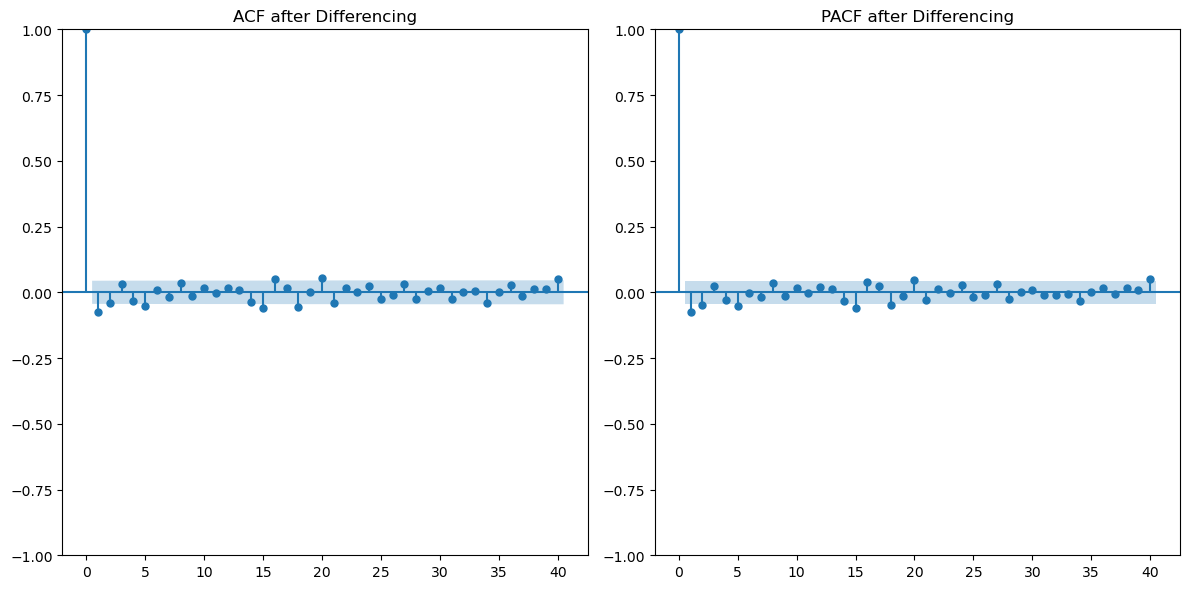

In [134]:
# ACF and PACF after first difference
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Close_diff'].dropna(), lags=40, ax=plt.gca())
plt.title("ACF after Differencing")

plt.subplot(122)
plot_pacf(df['Close_diff'].dropna(), lags=40, ax=plt.gca(), method='ywm')
plt.title("PACF after Differencing")

plt.tight_layout()
plt.show()

【 Differential ACF and PACF】
1. ACF (left) : Only the lag 0 has a large autocorrelation, and the other lags are almost all within the confidence interval, indicating that the data has become smooth after a difference.
2. PACF (right figure) : There is a large peak value only at the lag 0, and the rest of the lag terms are close to 0, indicating that the first-order difference is sufficient to remove the non-stationarity of the data.

【 Conclusion 】
This data requires a first difference (d=1) to make it smooth.

# 4. Predictive analysis

## 4.1 ARIMA Model

### Best Parameter

In [135]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Run auto_arima to select the best (p, d, q)
auto_model = auto_arima(
    df['Close'], 
    seasonal=False, 
    stepwise=True, 
    trace=True, 
    suppress_warnings=True, 
    information_criterion='bic', 
    error_action='ignore',  
    max_p=5, max_d=2, max_q=5, 
)

# Output optimal parameters
print(f"Best ARIMA Order: {auto_model.order}")

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=25410.584, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=25398.343, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=25394.904, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=25393.879, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=25391.694, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=25398.666, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.584 seconds
Best ARIMA Order: (0, 1, 0)


### Time Series Outlier detection (ARIMA residuals)

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# First fit a simple ARIMA model
model = ARIMA(df['Close'], order=(0,1,0))
model_fit = model.fit()

# Calculate the residual
residuals = model_fit.resid

# Identify abnormal residuals with IQR
Q1 = residuals.quantile(0.25)
Q3 = residuals.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

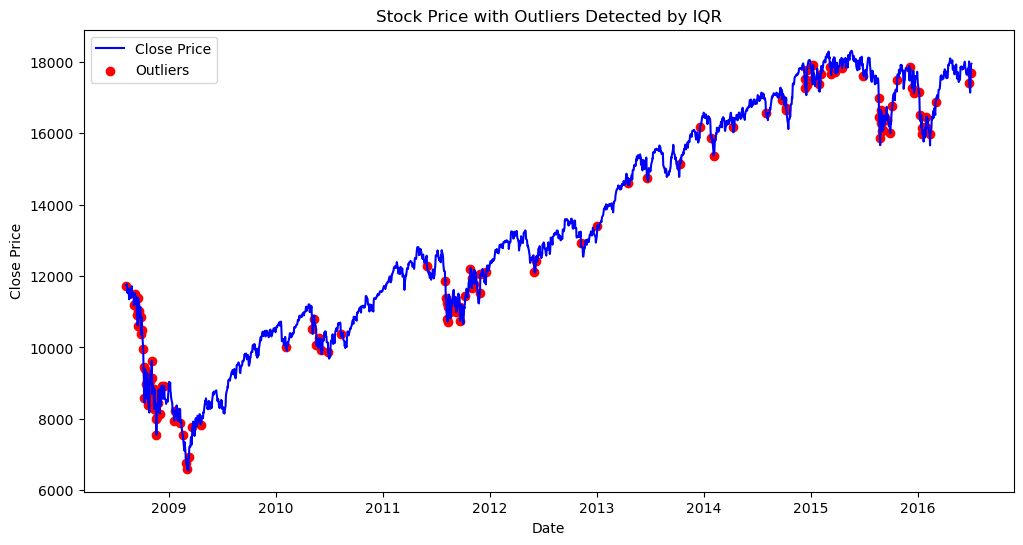

In [17]:
# Tag outliers
outliers = (residuals < lower_bound) | (residuals > upper_bound)

# Plot outliers
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.scatter(df.index[outliers], df['Close'][outliers], color='red', label='Outliers', marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price with Outliers Detected by IQR')
plt.legend()
plt.show()

In [18]:
# Remove outliers
df = df[~outliers]
df

,Close,High,Low,Open,Volume
Date,,,,,
2008-08-11,11782.34961,11867.11035,11675.53027,11729.66992,183190000
2008-08-12,11642.46973,11782.34961,11601.51953,11781.70020,173590000
2008-08-13,11532.95996,11633.78027,11453.33984,11632.80957,182550000
2008-08-14,11615.92969,11718.28027,11450.88965,11532.07031,159790000
2008-08-15,11659.90039,11709.88965,11599.73047,11611.20996,215040000
...,...,...,...,...,...
2016-06-23,18011.07031,18011.07031,17844.10938,17844.10938,98070000
2016-06-27,17140.24023,17355.21094,17063.08008,17355.21094,138740000
2016-06-28,17409.72070,17409.72070,17190.50977,17190.50977,112190000


【Reasons for choosing IQR to remove outliers】

The IQR method is based on quartiles and is suitable for non-normal data. The IQR method works for most data and does not depend on data distribution.


### ARIMA Model

MAE: 3784.777768944224
MSE: 20195244.84122156
RMSE: 4493.911975241789


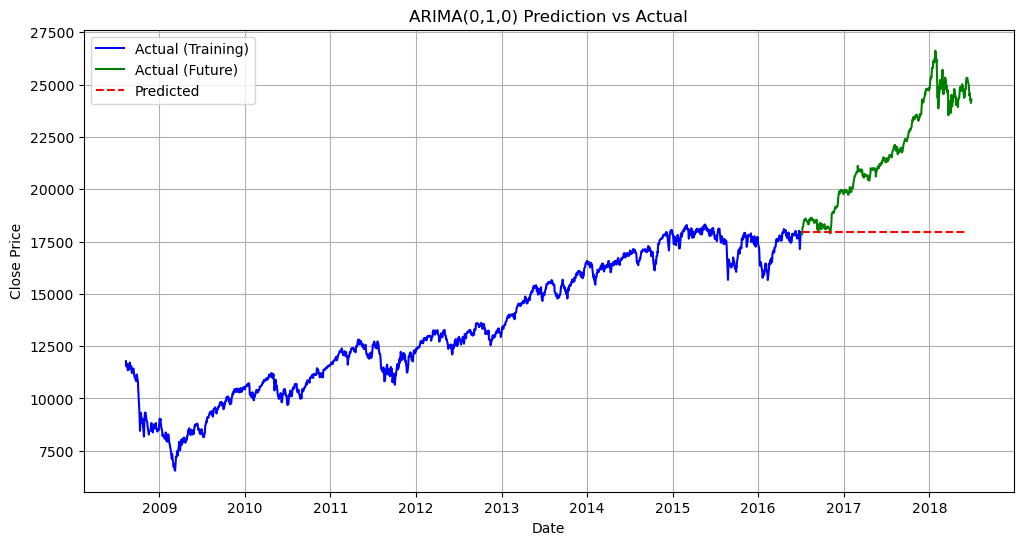

In [19]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
# ARIMA(0,1,0) model training (using the first eight years of data）
model = ARIMA(df['Close'], order=(0,1,0))
model_fit = model.fit()

# Forecast for the next two years (assuming 252 trading days per year)
future_predictions = model_fit.forecast(steps=502)

# Create a forecast time index
future_dates = pd.date_range(start=df.index[-1], periods=502 + 1, freq='B')[1:]

# Read real data for the next two years
actual_future_data = df_test['Close']

# calculation error
mae = mean_absolute_error(actual_future_data, future_predictions)
mse = mean_squared_error(actual_future_data, future_predictions)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Visual prediction results
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Actual (Training)', color='blue')
plt.plot(actual_future_data.index, actual_future_data, label='Actual (Future)', color='green')
plt.plot(future_dates, future_predictions, label='Predicted', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA(0,1,0) Prediction vs Actual')
plt.legend()
plt.grid()
plt.show()

### Cross Validation 

Starting 5-fold expanding-window CV for ARIMA (0, 1, 0)...


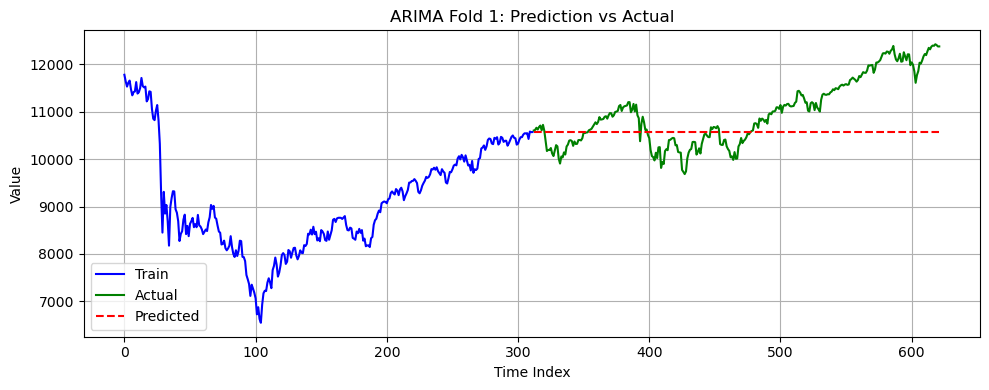

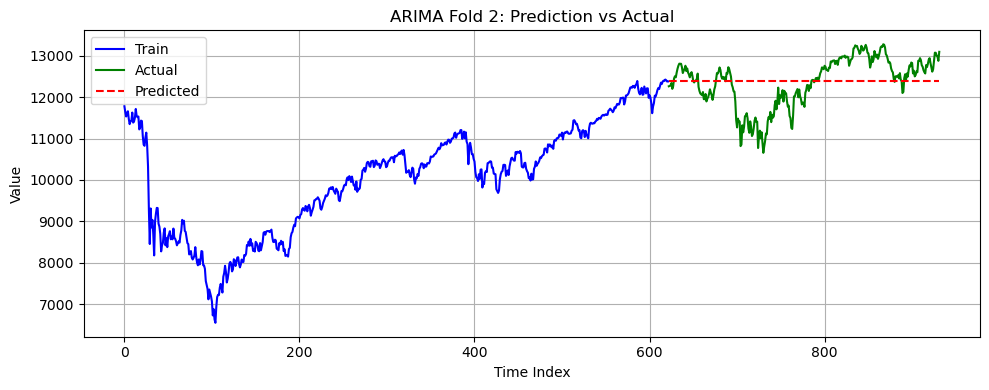

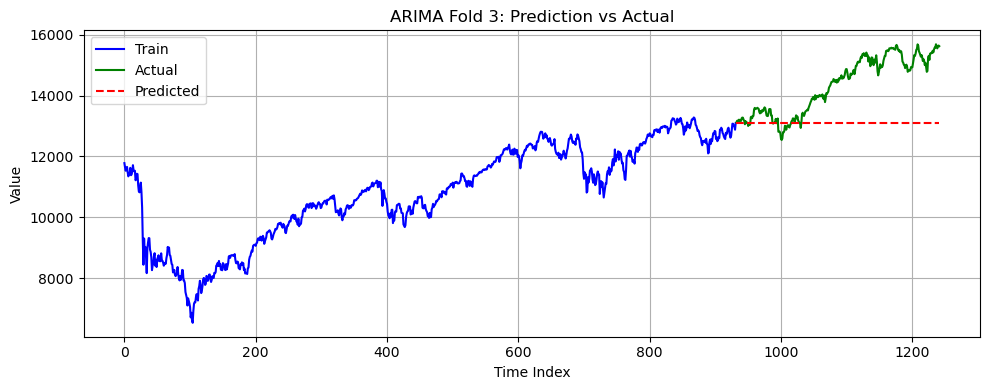

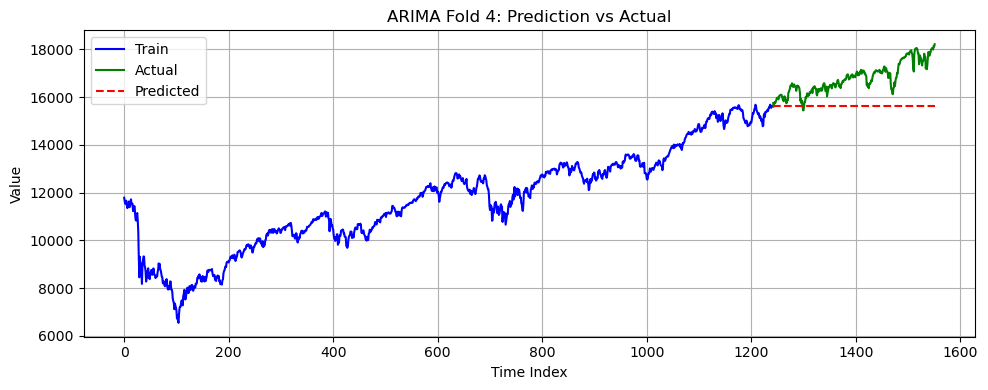

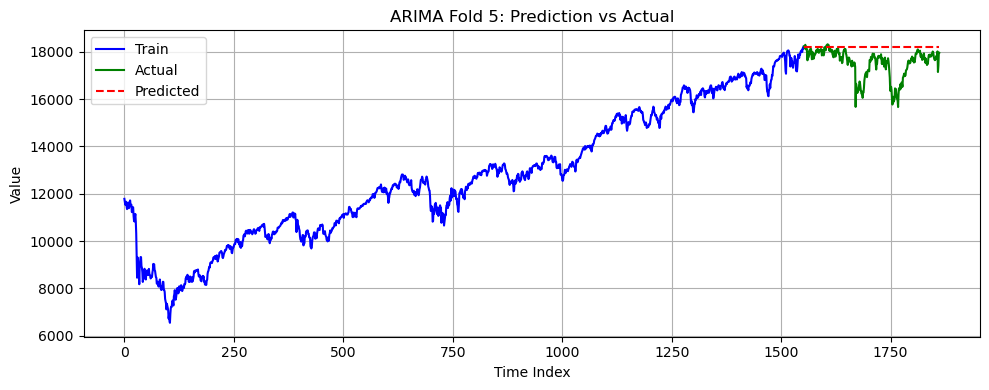

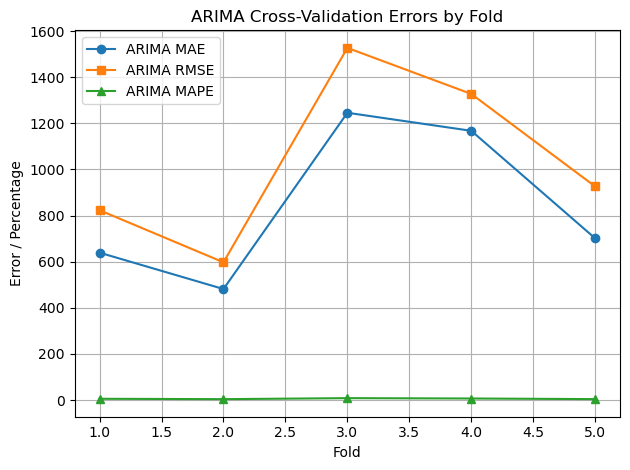

ARIMA CV results： MAE=847.122±303.311,  RMSE=1040.386±339.358,  MAPE=5.77%±1.65%


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# original data is df['Close']
data = df['Close'].values  

order = (0, 1, 0)
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

arima_mae, arima_rmse, arima_mape = [], [], []
print(f"Starting {n_splits}-fold expanding-window CV for ARIMA {order}...")

for fold, (train_idx, test_idx) in enumerate(tscv.split(data)):
    y_train, y_test = data[train_idx], data[test_idx]

    model = ARIMA(y_train, order=order)
    fit = model.fit()
    pred = fit.forecast(steps=len(y_test))

    arima_mae.append(mean_absolute_error(y_test, pred))
    arima_rmse.append(np.sqrt(mean_squared_error(y_test, pred)))
    arima_mape.append(np.mean(np.abs((y_test - pred) / y_test)) * 100)

  # Visualization
    plt.figure(figsize=(10, 4))
    plt.plot(range(len(y_train)), y_train, label='Train', color='blue')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual', color='green')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), pred, label='Predicted', linestyle='--', color='red')
    plt.title(f"ARIMA Fold {fold + 1}: Prediction vs Actual")
    plt.xlabel("Time Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# The line chart shows the error index
folds = np.arange(1, n_splits + 1)
plt.figure()
plt.plot(folds, arima_mae, marker='o', label='ARIMA MAE')
plt.plot(folds, arima_rmse, marker='s', label='ARIMA RMSE')
plt.plot(folds, arima_mape, marker='^', label='ARIMA MAPE')
plt.xlabel('Fold')
plt.ylabel('Error / Percentage')
plt.title('ARIMA Cross-Validation Errors by Fold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Output Value
print(
    "ARIMA CV results：",
    f"MAE={np.mean(arima_mae):.3f}±{np.std(arima_mae):.3f}, ",
    f"RMSE={np.mean(arima_rmse):.3f}±{np.std(arima_rmse):.3f}, ",
    f"MAPE={np.mean(arima_mape):.2f}%±{np.std(arima_mape):.2f}%"
)


### Trend and Seasonality Forecast Using SVR with Linear Kernel

MAE: 1545.31
MSE: 3758096.52
RMSE: 1938.58


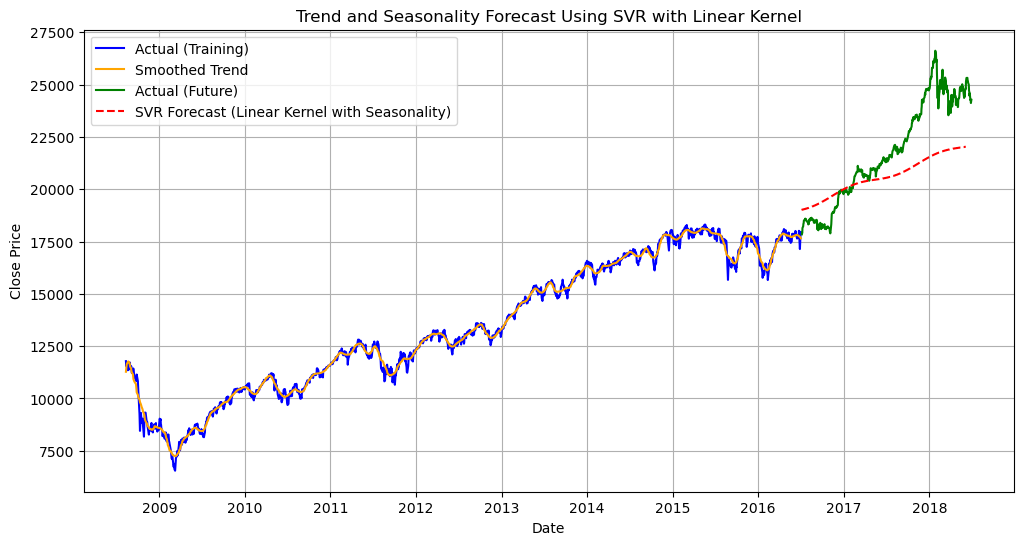

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.signal import savgol_filter

# Extract trends
trend = pd.Series(savgol_filter(df['Close'], window_length=51, polyorder=3), index=df.index)
trend_valid = trend.dropna()

# Create periodic characteristics (sine and cosine)
df['day_of_year'] = df.index.dayofyear
df['sin_day'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['cos_day'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

# Use time steps and periodic features as characteristics 
X = np.column_stack([np.arange(len(trend_valid)), df['sin_day'].iloc[:len(trend_valid)], df['cos_day'].iloc[:len(trend_valid)]])
y = trend_valid.values

# Use SVR fitting (linear kernel function)
svr_model = SVR(kernel='linear', C=100, epsilon=0.1)  # Use linear kernel functions
svr_model.fit(X, y)

# Extrapolate future trends
future_steps = 502  # two years
future_dates = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='B')[1:]

# Calculate the periodic characteristics of the future
future_days_of_year = future_dates.dayofyear
future_sin_day = np.sin(2 * np.pi * future_days_of_year / 365)
future_cos_day = np.cos(2 * np.pi * future_days_of_year / 365)
future_X = np.column_stack([np.arange(len(trend_valid), len(trend_valid) + future_steps), future_sin_day, future_cos_day])

# forecast
future_trend = svr_model.predict(future_X)

# actual data
actual_future_data = df_test['Close']

# error appraisal
mae = mean_absolute_error(actual_future_data, future_trend)
mse = mean_squared_error(actual_future_data, future_trend)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# visualization
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Actual (Training)', color='blue')
plt.plot(trend.index, trend, label='Smoothed Trend', color='orange')
plt.plot(actual_future_data.index, actual_future_data, label='Actual (Future)', color='green')
plt.plot(future_dates, future_trend, label='SVR Forecast (Linear Kernel with Seasonality)', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Trend and Seasonality Forecast Using SVR with Linear Kernel')
plt.legend()
plt.grid()
plt.show()

## 4.2 SARIMA Model

### Outlier detection (SARIMA residuals)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43253D+00    |proj g|=  2.43217D-02


 This problem is unconstrained.



At iterate    5    f=  6.43173D+00    |proj g|=  2.52515D-03

At iterate   10    f=  6.42814D+00    |proj g|=  5.00104D-02

At iterate   15    f=  6.41178D+00    |proj g|=  4.50516D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     21      1     0     0   1.460D-07   6.412D+00
  F =   6.4117552781131932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


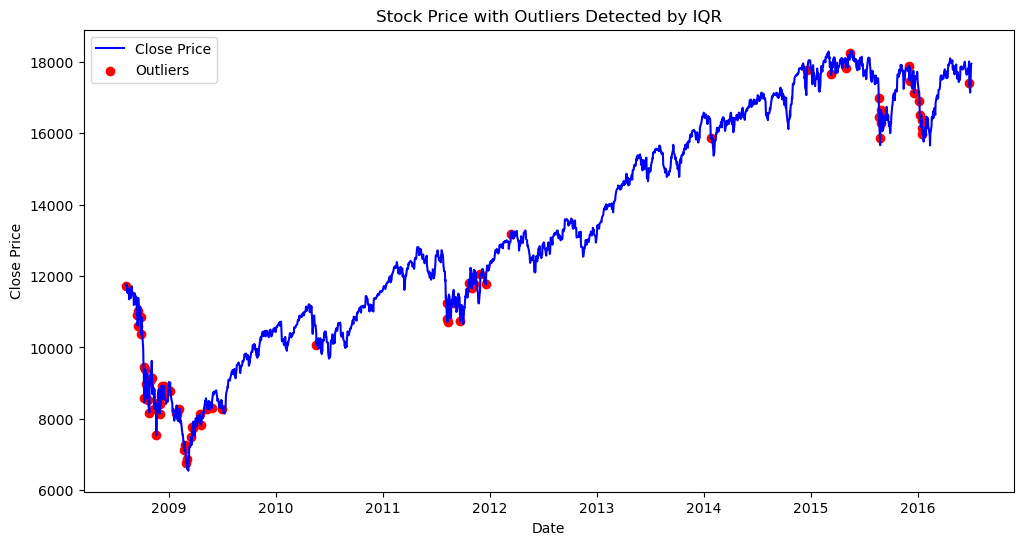

,Close,High,Low,Open,Volume
Date,,,,,
2008-08-11,11782.34961,11867.11035,11675.53027,11729.66992,183190000
2008-08-12,11642.46973,11782.34961,11601.51953,11781.70020,173590000
2008-08-13,11532.95996,11633.78027,11453.33984,11632.80957,182550000
2008-08-14,11615.92969,11718.28027,11450.88965,11532.07031,159790000
2008-08-15,11659.90039,11709.88965,11599.73047,11611.20996,215040000
...,...,...,...,...,...
2016-06-27,17140.24023,17355.21094,17063.08008,17355.21094,138740000
2016-06-28,17409.72070,17409.72070,17190.50977,17190.50977,112190000
2016-06-29,17694.67969,17704.50977,17456.01953,17456.01953,106380000


In [21]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

file_path = '/Users/xxxxswl/graduate programming/527/2ndpre/^DJI_historical_data-2.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# First fit a simple ARIMA model
model = SARIMAX(df['Close'], order=(1,1,0),seasonal_order=(1, 1, 0, 45))
model_fit = model.fit()

# Calculate the residual
residuals = model_fit.resid

# Identify abnormal residuals with IQR
Q1 = residuals.quantile(0.25)
Q3 = residuals.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tag outliers
outliers = (residuals < lower_bound) | (residuals > upper_bound)

# Plot outliers
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.scatter(df.index[outliers], df['Close'][outliers], color='red', label='Outliers', marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price with Outliers Detected by IQR')
plt.legend()
plt.show()

# Remove outliers
df = df[~outliers]
df

### SARIMA Model

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.41684D+00    |proj g|=  1.82839D-02

At iterate    5    f=  6.41640D+00    |proj g|=  2.83420D-03

At iterate   10    f=  6.41301D+00    |proj g|=  5.12095D-02

At iterate   15    f=  6.39950D+00    |proj g|=  2.98742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     21      1     0     0   6.732D-08   6.399D+00
  F =   6.3994829980911865     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


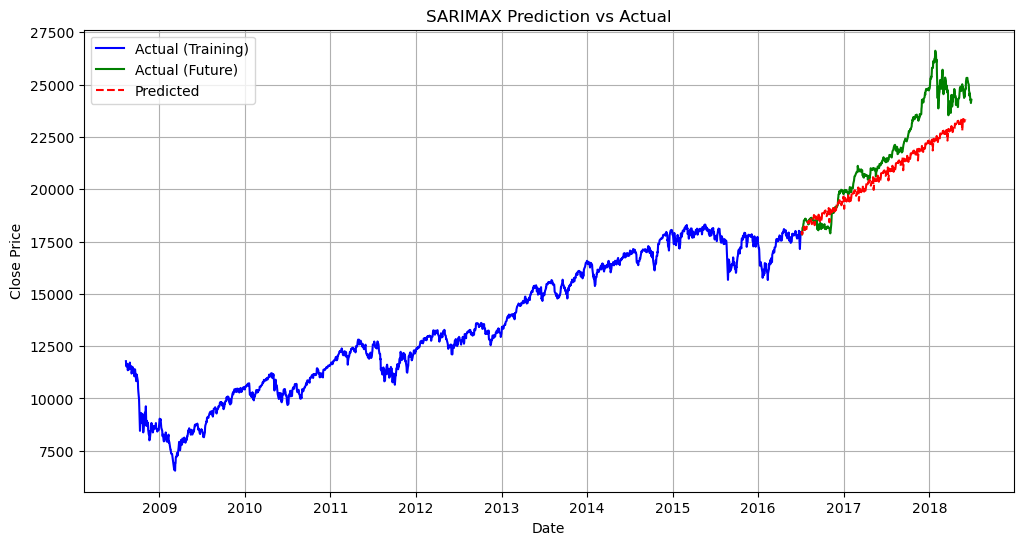

MAE: 1153.079925241158
MSE: 2168789.2446387433
RMSE: 1472.6809717785939


In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Use the seasonal ARIMA model
model = SARIMAX(df['Close'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 45))  # Assume a seasonal period of 60 days
model_fit = model.fit()

# Forecast for the next two years (502 trading days)
future_predictions = model_fit.forecast(steps=502)

# Create a forecast time index
future_dates = pd.date_range(start=df.index[-1], periods=502 + 1, freq='B')[1:]

# Read real data for the next two years
actual_future_data = df_test['Close']

# Visual prediction results
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Actual (Training)', color='blue')
plt.plot(actual_future_data.index, actual_future_data, label='Actual (Future)', color='green')
plt.plot(future_dates, future_predictions, label='Predicted', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SARIMAX Prediction vs Actual')
plt.legend()
plt.grid()
plt.show()

# calculation error
mae = mean_absolute_error(actual_future_data, future_predictions)
mse = mean_squared_error(actual_future_data, future_predictions)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

### Cross Validation

Starting 5-fold expanding-window CV for SARIMA (1, 1, 0) seasonal (1, 1, 0, 45)...


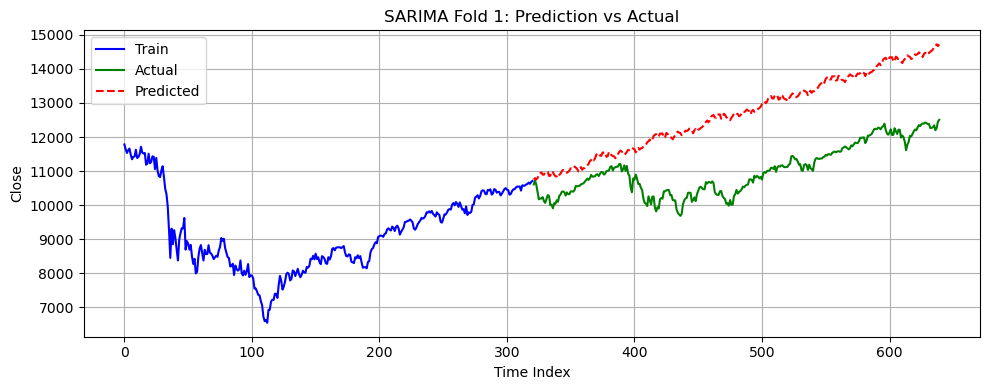

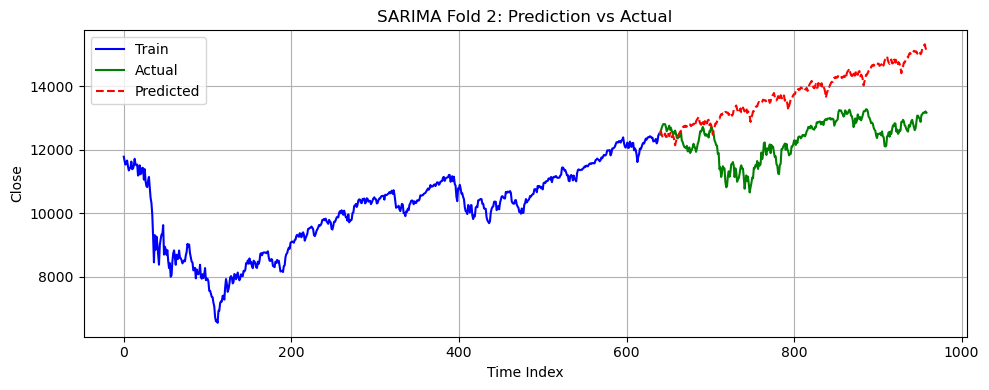

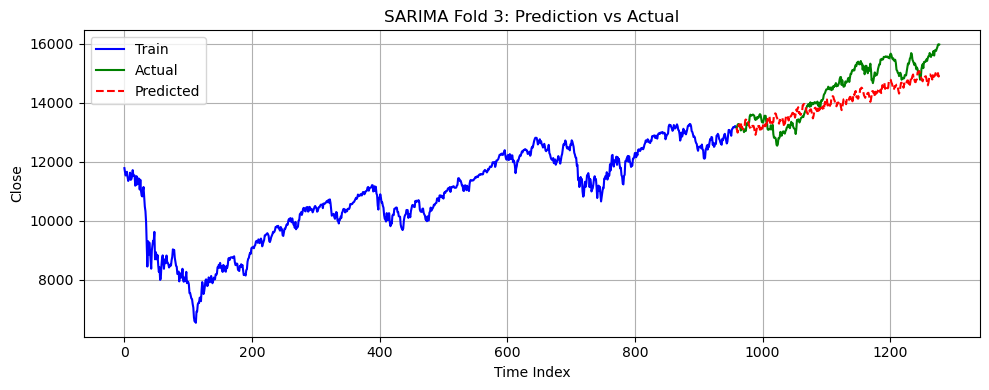

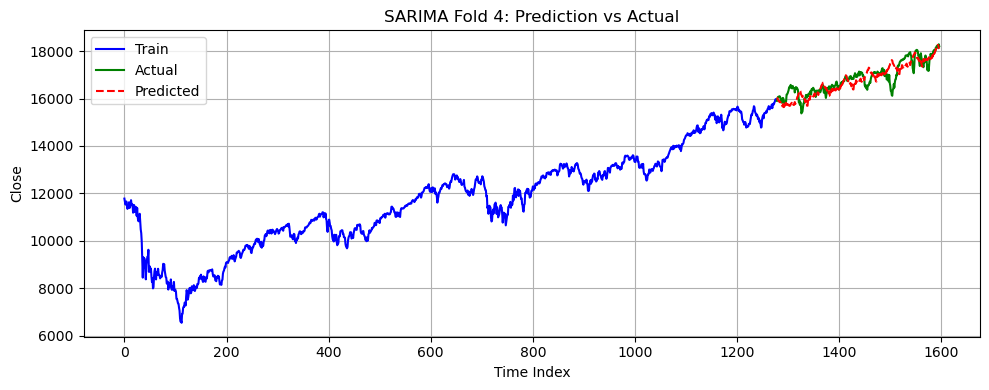

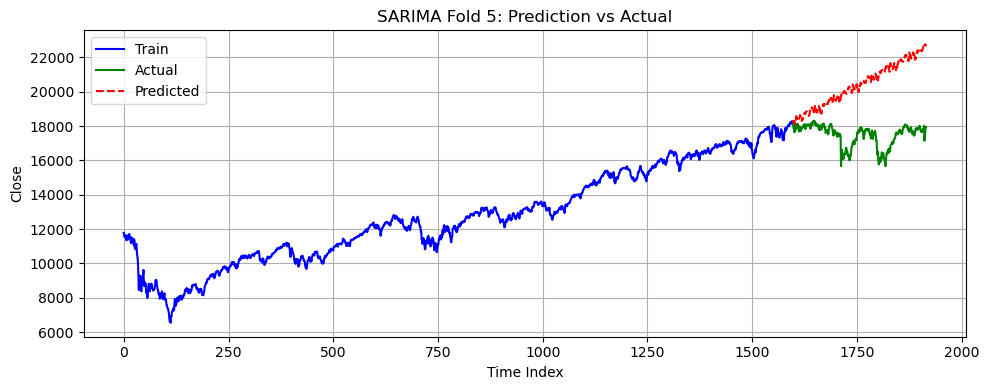

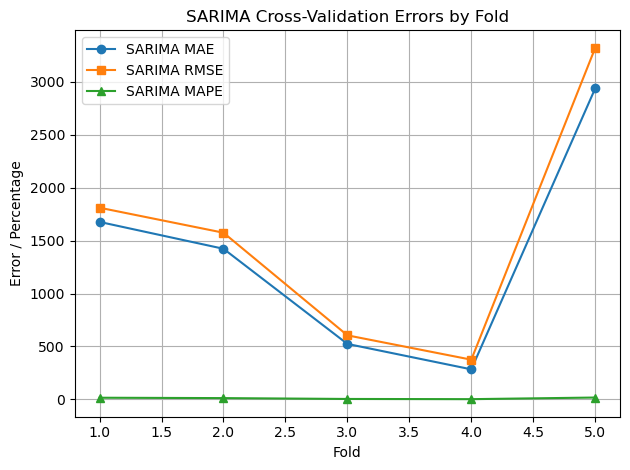

SARIMA CV results: MAE=1369.348±944.037,  RMSE=1537.589±1047.113,  MAPE=9.83%±6.15%


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# --- Parameters ---
order = (1, 1, 0)
seasonal_order = (1, 1, 0, 45)
n_splits = 5

# --- Data ---
y = df['Close'].values  
tscv = TimeSeriesSplit(n_splits=n_splits)

# --- Metrics storage ---
sarima_mae, sarima_rmse, sarima_mape = [], [], []

print(f"Starting {n_splits}-fold expanding-window CV for SARIMA {order} seasonal {seasonal_order}...")

# --- Cross-validation loop ---
for fold, (train_idx, test_idx) in enumerate(tscv.split(y)):
    y_train, y_test = y[train_idx], y[test_idx]
    
    model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    fit = model.fit(disp=False)
    pred = fit.forecast(steps=len(y_test))

    # Compute errors
    sarima_mae.append(mean_absolute_error(y_test, pred))
    sarima_rmse.append(np.sqrt(mean_squared_error(y_test, pred)))
    sarima_mape.append(np.mean(np.abs((y_test - pred) / y_test)) * 100)

    # Visualization per fold
    plt.figure(figsize=(10, 4))
    plt.plot(range(len(y_train)), y_train, label='Train', color='blue')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual', color='green')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), pred, label='Predicted', linestyle='--', color='red')
    plt.title(f"SARIMA Fold {fold + 1}: Prediction vs Actual")
    plt.xlabel("Time Index")
    plt.ylabel("Close")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Plot metrics by fold ---
folds = np.arange(1, n_splits + 1)
plt.figure()
plt.plot(folds, sarima_mae, marker='o', label='SARIMA MAE')
plt.plot(folds, sarima_rmse, marker='s', label='SARIMA RMSE')
plt.plot(folds, sarima_mape, marker='^', label='SARIMA MAPE')
plt.xlabel('Fold')
plt.ylabel('Error / Percentage')
plt.title('SARIMA Cross-Validation Errors by Fold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Print results ---
print(
    "SARIMA CV results:",
    f"MAE={np.mean(sarima_mae):.3f}±{np.std(sarima_mae):.3f}, ",
    f"RMSE={np.mean(sarima_rmse):.3f}±{np.std(sarima_rmse):.3f}, ",
    f"MAPE={np.mean(sarima_mape):.2f}%±{np.std(sarima_mape):.2f}%"
)


    Model    MAE (mean ± std)    RMSE (mean ± std) MAPE (mean ± std)
0   ARIMA   847.122 ± 303.311   1040.386 ± 339.358     5.77% ± 1.65%
1  SARIMA  1369.348 ± 944.037  1537.589 ± 1047.113     9.83% ± 6.15%


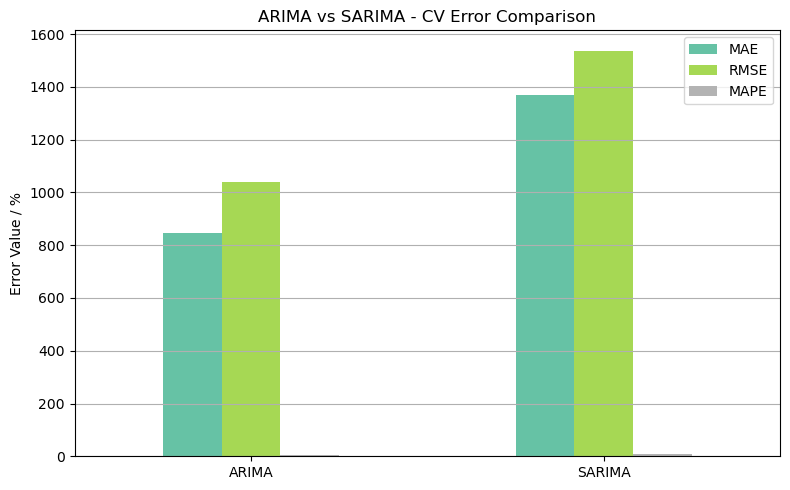

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Model": ["ARIMA", "SARIMA"],
    "MAE (mean ± std)": ["847.122 ± 303.311", "1369.348 ± 944.037"],
    "RMSE (mean ± std)": ["1040.386 ± 339.358", "1537.589 ± 1047.113"],
    "MAPE (mean ± std)": ["5.77% ± 1.65%", "9.83% ± 6.15%"]
}

df_results = pd.DataFrame(data)
print(df_results)

metrics_mean = {
    "ARIMA": [847.122, 1040.386, 5.77],
    "SARIMA": [1369.348, 1537.589, 9.83]
}
df_plot = pd.DataFrame(metrics_mean, index=["MAE", "RMSE", "MAPE"])
df_plot.T.plot(kind="bar", figsize=(8, 5), colormap="Set2")

plt.title("ARIMA vs SARIMA - CV Error Comparison")
plt.ylabel("Error Value / %")
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### Residual Analysis

1916    17863.703693
1917    17943.477089
1918    17972.585761
1919    17840.820353
1920    17967.646630
            ...     
2413    23319.349911
2414    23184.734943
2415    23235.498770
2416    23253.268548
2417    23321.329323
Name: predicted_mean, Length: 502, dtype: float64

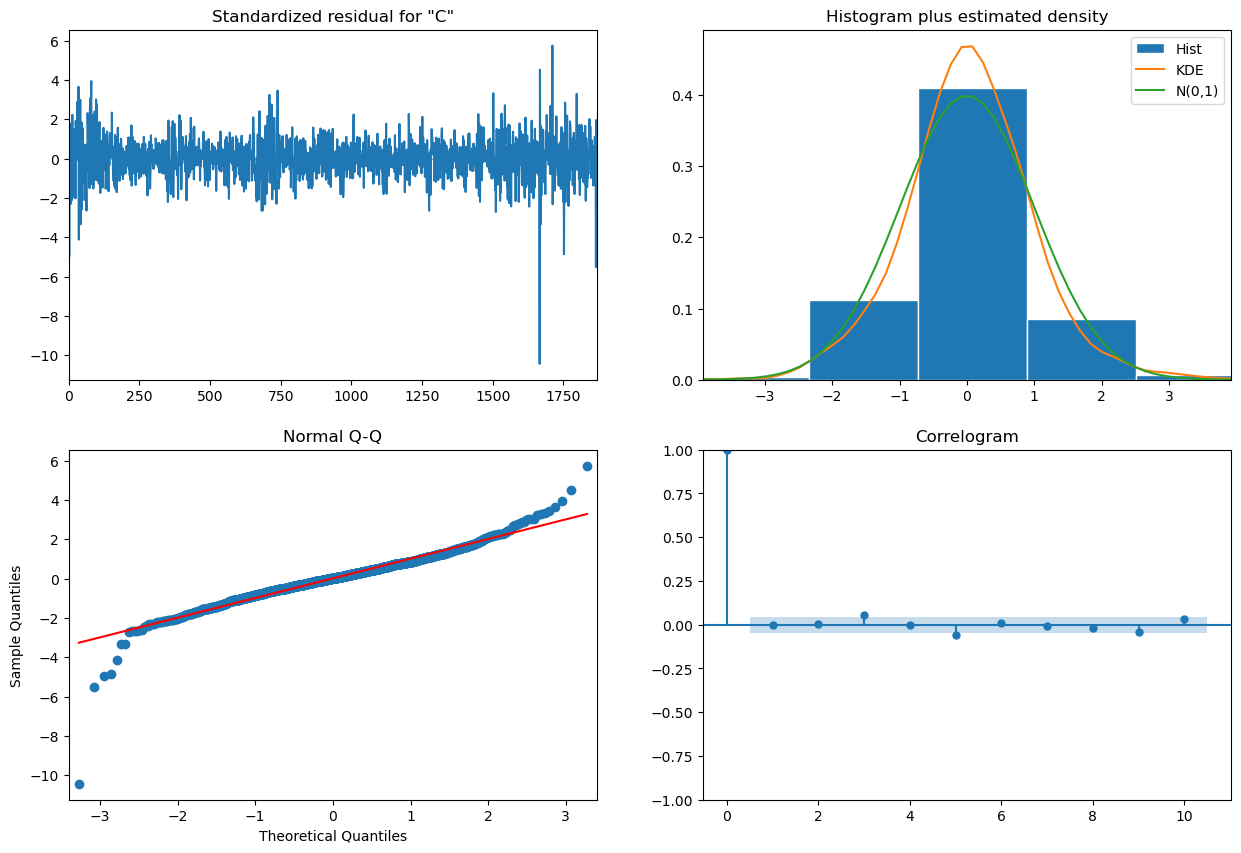

In [145]:
# Print model diagnostic information
model_fit.plot_diagnostics(figsize=(15, 10))
future_predictions

- **Graphs**
1. Top left (Residual time series diagram)：
   The graph shows some large fluctuations that may indicate that the model fails to fully capture the dynamic characteristics of the data.
2. Top right (residual distribution map) ：
   There is some deviation in the tail, indicating that the residual may have a slight irregularity.
3. Lower left (Q-Q)：
   The plot shows that the tail data points deviate from the line, indicating that the residual may have a heavy-tail effect, indicating that outliers or non-normal effects are still present.
4. Lower right (ACF Autocorrelation)：
   The figure shows that most of the autocorrelation coefficients are within the confidence interval, indicating that the residual is essentially autocorrelation-free.

- **Conclusion**
1. The residual is generally white noise, the autocorrelation is small, and the fitting quality of the model is good.
2. A slight anomaly in the tail of the residual distribution indicates that there may be extreme values or that the model fails to fully capture the data pattern.

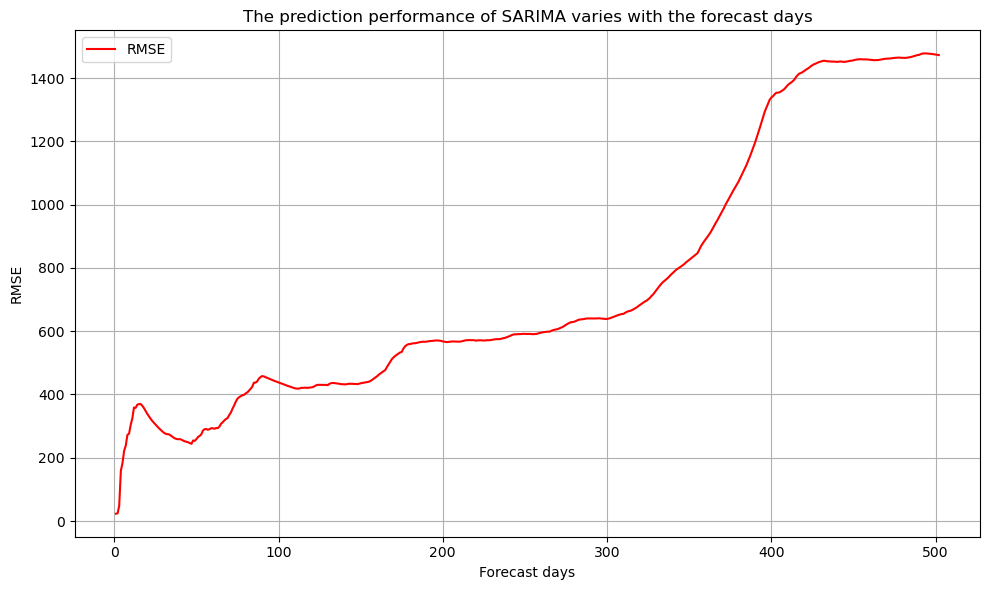

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

train_data = df['Close']
test_data = df_test['Close']
n_test = len(test_data)

# Fit a sub-SARIMA model (only do it once!)
model = SARIMAX(train_data, order=(1,1,0), seasonal_order=(1,1,0,45))
model_fit = model.fit(disp=False)

rmse_list = []

for i in range(1, n_test + 1):
    forecast = model_fit.get_forecast(steps=i)
    predicted = forecast.predicted_mean.dropna()  # Remove the NaN value
    actual = test_data[:i].dropna()  # Remove the NaN value
    if len(actual) == len(predicted):
        rmse = np.sqrt(mean_squared_error(actual, predicted))
        rmse_list.append(rmse)
    else:
        print("Warning: The actual and predicted values do not match in length")
   
# Visualization: Predicted days vs RMSE
plt.figure(figsize=(10,6))
plt.plot(range(1, n_test+1), rmse_list, color='red', label='RMSE')
plt.xlabel('Forecast days')
plt.ylabel('RMSE')
plt.title('The prediction performance of SARIMA varies with the forecast days')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

1. Analysis of results: RMSE suddenly becomes larger on the 300-400 day forecast, which generally indicates a significant deterioration in the model's forecasting performance over this time period
2. Solution: Try to use a smoothing method (such as difference or logarithmic transformation) to remove the trend component, making the data more stable and conducive to model learning.

### Using Log Function

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.70020D+00    |proj g|=  2.17919D+04



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0   2.179D+04  -2.700D+00
  F =  -2.7002039245275951     

ABNORMAL_TERMINATION_IN_LNSRCH                              


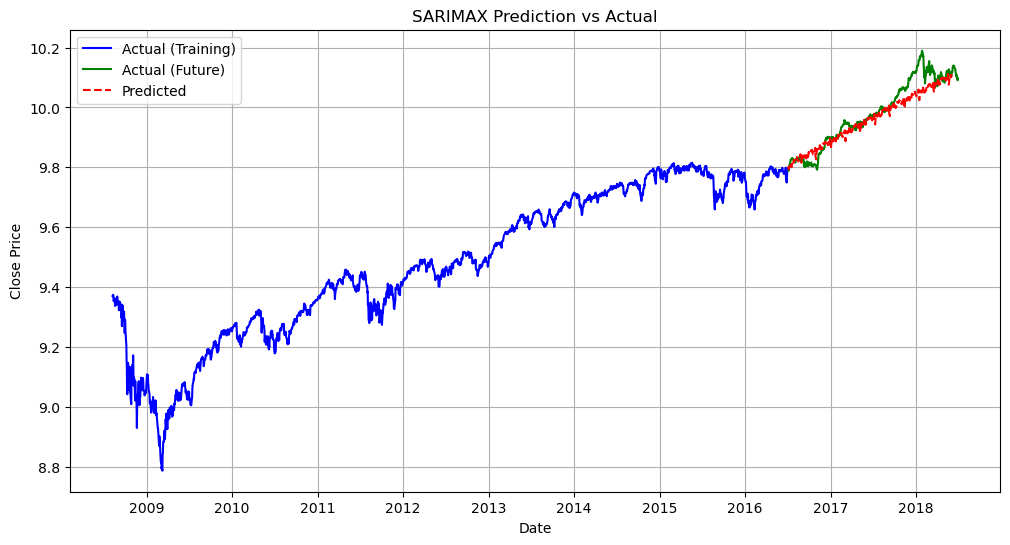

MAE (original scale): 677.87712715211
MSE (original scale): 925609.8510415283
RMSE (original scale): 962.086197303302


In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error,mean_absolute_error

file_path = '/Users/xxxxswl/graduate programming/527/2ndpre/^DJI_historical_data-2.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# 1. Logarithmic transformation of the raw data
df['Log_Close'] = np.log(df['Close'])
df_test['Log_Close'] = np.log(df_test['Close'])

train_data = df['Log_Close'] 
test_data = df_test['Log_Close']  

# 2. Predictions are made using the SARIMA model
model = SARIMAX(train_data, order=(1, 1, 0), seasonal_order=(1, 1, 0, 45), trend='t')
model_fit2 = model.fit()

# Forecast for the next two years (502 trading days)
future_predictions2 = model_fit2.forecast(steps=502)

# Create a forecast time index
future_dates = pd.date_range(start=df.index[-1], periods=502 + 1, freq='B')[1:]

# Read real data for the next two years
actual_future_data = df_test['Log_Close']

# Visual prediction results
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Log_Close'], label='Actual (Training)', color='blue')
plt.plot(actual_future_data.index, actual_future_data, label='Actual (Future)', color='green')
plt.plot(future_dates, future_predictions2, label='Predicted', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SARIMAX Prediction vs Actual')
plt.legend()
plt.grid()
plt.show()

# Restore the predicted and true values (from the logarithmic space back to the price space)
actual_prices = np.exp(actual_future_data)
predicted_prices_log = np.exp(future_predictions2)

# calculate the error
mae = mean_absolute_error(actual_prices, predicted_prices_log)
mse = mean_squared_error(actual_prices, predicted_prices_log)
rmse = np.sqrt(mse)

print(f"MAE (original scale): {mae}")
print(f"MSE (original scale): {mse}")
print(f"RMSE (original scale): {rmse}")

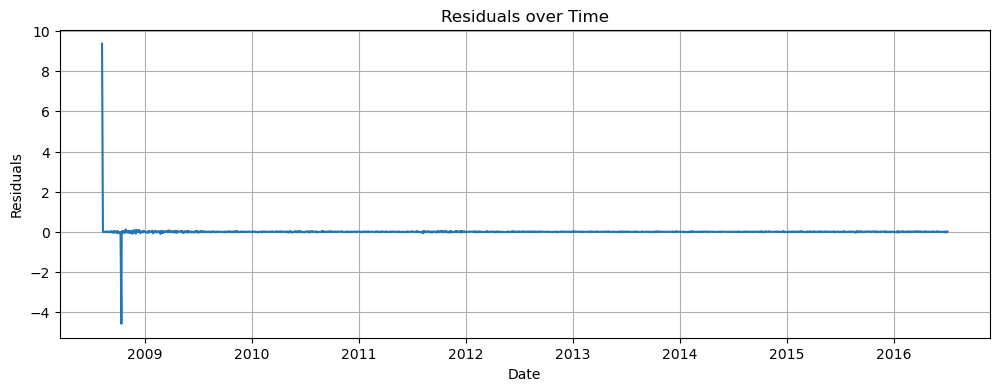

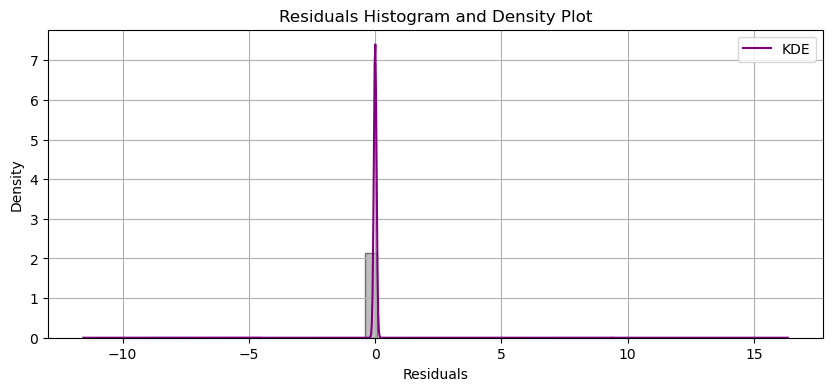

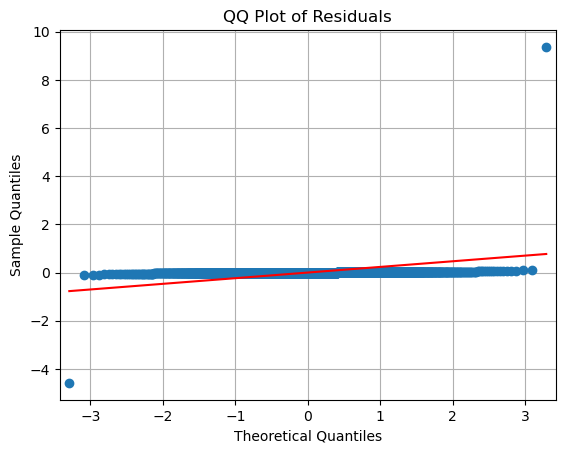

Ljung-Box Test:
     lb_stat  lb_pvalue
10  0.183369        1.0


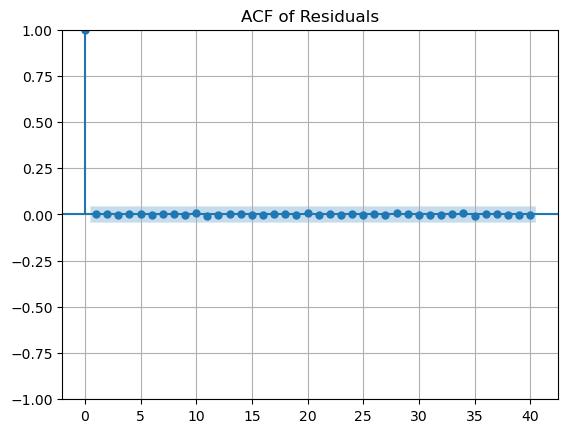

In [149]:
# ---------------- Residual Analysis ----------------
residuals = model_fit2.resid

# Residuals over Time
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title("Residuals over Time")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Residuals Histogram and Density Plot
plt.figure(figsize=(10, 4))
residuals.plot(kind='kde', color='purple', label='KDE')
plt.hist(residuals, bins=30, alpha=0.5, color='gray', edgecolor='black', density=True)
plt.title("Residuals Histogram and Density Plot")
plt.xlabel("Residuals")
plt.legend()
plt.grid(True)
plt.show()

# QQ Plot of Residuals
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.grid(True)
plt.show()

# Ljung-Box Test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test:")
print(lb_test)

# ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=40)
plt.title("ACF of Residuals")
plt.grid(True)
plt.show()

1. Residuals over Time
The residuals are close to zero for most of the time in the time series, with fluctuations only in 2009, indicating that the SARIMA model fits well for the vast majority of the time.
2. Residuals Histogram + KDE
The high concentration of residuals at 0 indicates that the model prediction is very close to the true value.
3. QQ Plot of Residuals
The model residuals roughly follow a normal distribution;
4. ACF Plot of Residuals
The model captures most of the structural information; Residual image "white noise".
5. Ljung-Box Test
p-value = 1.0 >> 0.05, indicating that the null hypothesis that "the residuals are white noise" cannot be rejected; That is, the residual is white noise, indicating that the model has fully fitted the structure in the data.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.70238D+00    |proj g|=  1.04122D+06


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     52      2     0     0   1.030D+06  -2.703D+00
  F =  -2.7026639513428763     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


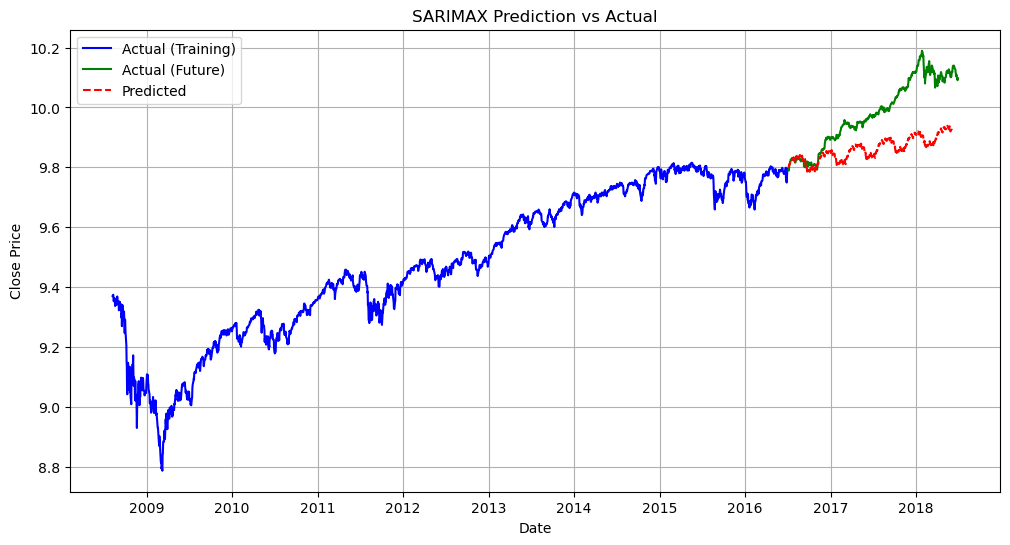

MAE (original scale): 2586.3802651365777
MSE (original scale): 9977598.73075268
RMSE (original scale): 3158.7337226731665


In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error,mean_absolute_error

# 1. Logarithmic transformation of the raw data
df['Log_Close'] = np.log(df['Close'])
df_test['Log_Close'] = np.log(df_test['Close'])

train_data = df['Log_Close'] 
test_data = df_test['Log_Close']  

# 2. Predictions are made using the SARIMA model
model = SARIMAX(train_data, order=(1, 1, 2), seasonal_order=(1, 1, 1, 90), trend='t')
model_fit2 = model.fit()

# Forecast for the next two years (502 trading days)
future_predictions2 = model_fit2.forecast(steps=502)

# Create a forecast time index
future_dates = pd.date_range(start=df.index[-1], periods=502 + 1, freq='B')[1:]

# Read real data for the next two years
actual_future_data = df_test['Log_Close']

# Visual prediction results
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Log_Close'], label='Actual (Training)', color='blue')
plt.plot(actual_future_data.index, actual_future_data, label='Actual (Future)', color='green')
plt.plot(future_dates, future_predictions2, label='Predicted', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SARIMAX Prediction vs Actual')
plt.legend()
plt.grid()
plt.show()

# Restore the predicted and true values (from the logarithmic space back to the price space)
actual_prices = np.exp(actual_future_data)
predicted_prices3 = np.exp(future_predictions2)

# calculate the error
mae = mean_absolute_error(actual_prices, predicted_prices3)
mse = mean_squared_error(actual_prices, predicted_prices3)
rmse = np.sqrt(mse)

print(f"MAE (original scale): {mae}")
print(f"MSE (original scale): {mse}")
print(f"RMSE (original scale): {rmse}")

### Trend + SARIMA Residuals Prediction

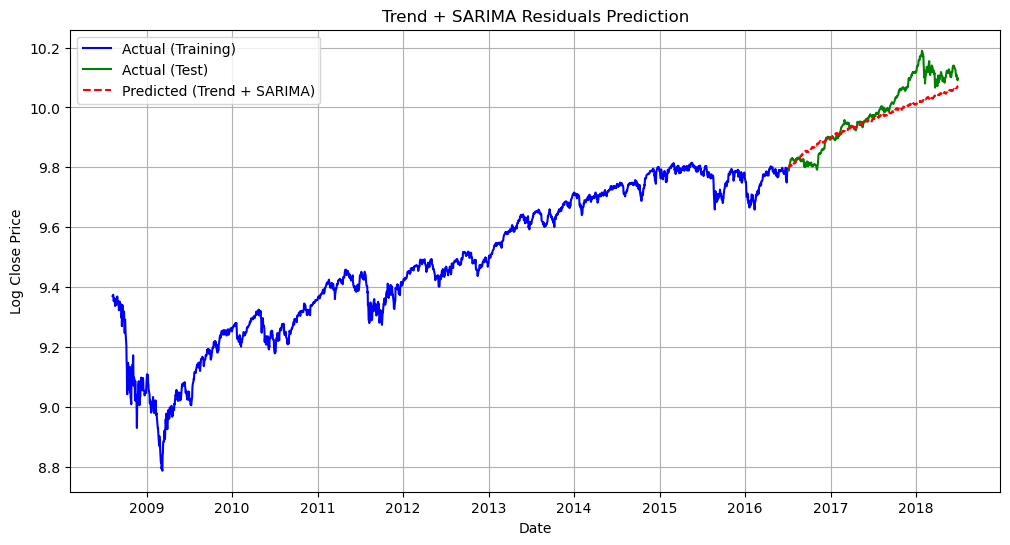

MAE: 913.6270
MSE: 1612616.8566
RMSE: 1269.8885


In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. logarithmic transformation
df['Log_Close'] = np.log(df['Close'])
df_test['Log_Close'] = np.log(df_test['Close'])

train_data = df['Log_Close']
test_data = df_test['Log_Close']

# 2. Establish the time variable as the regression independent variable
time_idx = np.arange(len(train_data)).reshape(-1, 1)

# 3. Fit the linear trend
trend_model = LinearRegression()
trend_model.fit(time_idx, train_data)
trend_fitted = trend_model.predict(time_idx)

# 4. Calculate the residuals of the training set
residuals = train_data.values - trend_fitted

# 5. The residuals are fitted using the SARIMA model
sarima_model = SARIMAX(residuals, order=(2, 0, 2), seasonal_order=(1, 1, 1, 45))
sarima_result = sarima_model.fit(disp=False)

# 6. Predict future trends and residuals
n_steps = len(test_data)
future_time_idx = np.arange(len(train_data), len(train_data) + n_steps).reshape(-1, 1)
future_trend = trend_model.predict(future_time_idx)
forecasted_residuals = sarima_result.forecast(steps=n_steps)

# 7. Final prediction = trend residual
log_predictions = future_trend + forecasted_residuals
predicted_prices2 = np.exp(log_predictions)
actual_prices = np.exp(test_data)

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Log_Close'], label='Actual (Training)', color='blue')
plt.plot(df_test.index, df_test['Log_Close'], label='Actual (Test)', color='green')
plt.plot(df_test.index, log_predictions, label='Predicted (Trend + SARIMA)', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Log Close Price')
plt.title('Trend + SARIMA Residuals Prediction')
plt.legend()
plt.grid()
plt.show()

mae = mean_absolute_error(actual_prices, predicted_prices2)
mse = mean_squared_error(actual_prices, predicted_prices2)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

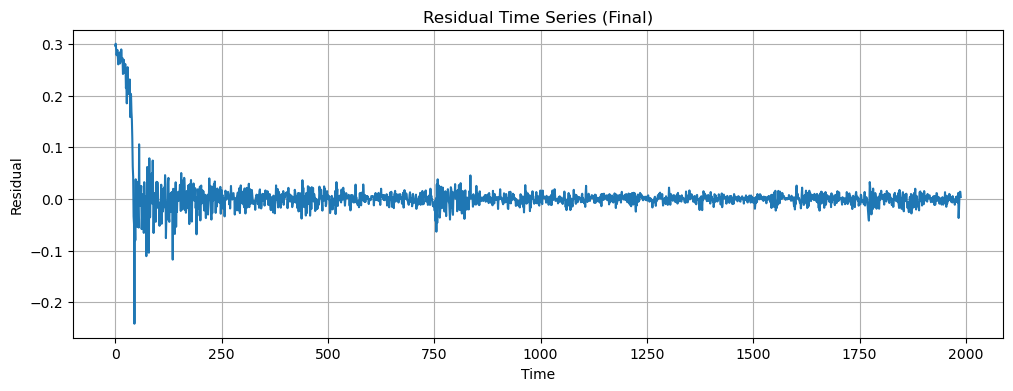

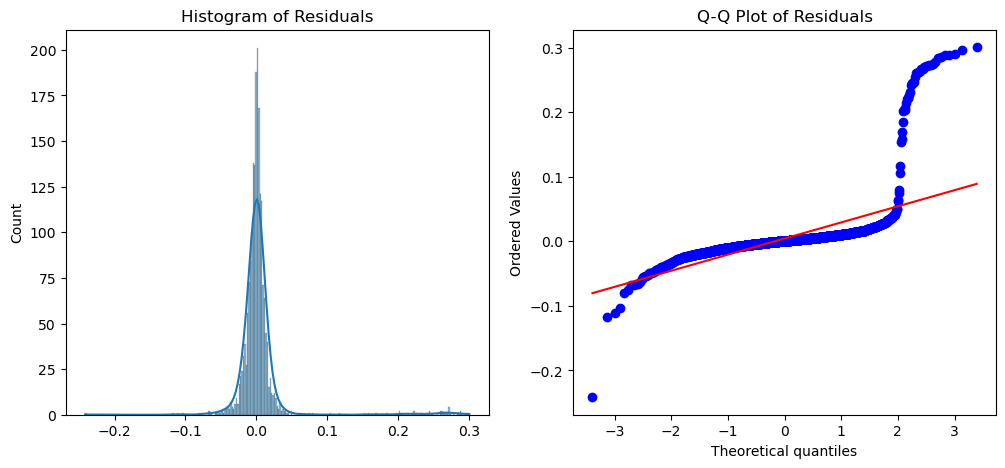

Shapiro-Wilk test: statistic=0.4262, p-value=0.0000


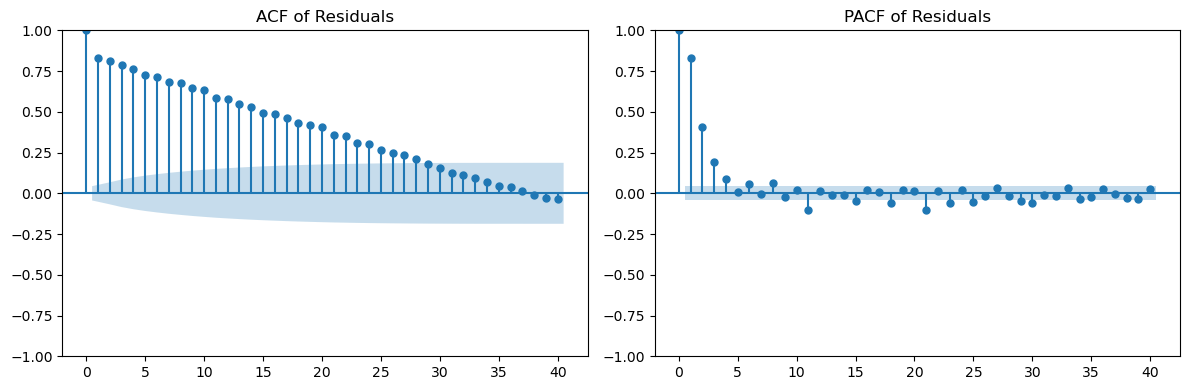

Ljung-Box Test (H0: Residuals are white noise):
         lb_stat  lb_pvalue
10  10607.157516        0.0
20  15569.051200        0.0
30  17028.864490        0.0


In [152]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

residuals_full_fitted = sarima_result.fittedvalues
full_residual = residuals - residuals_full_fitted 

# Residual time sequence diagram
plt.figure(figsize=(12,4))
plt.plot(full_residual)
plt.title("Residual Time Series (Final)")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.grid(True)
plt.show()

# Normality test of the Q-Q graph of the residual distribution map
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(full_residual, kde=True)
plt.title("Histogram of Residuals")

plt.subplot(1,2,2)
stats.probplot(full_residual, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# normality test：Shapiro-Wilk
shapiro_test = stats.shapiro(full_residual)
print(f"Shapiro-Wilk test: statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

# ACF + PACF
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(full_residual, ax=ax[0], lags=40)
plot_pacf(full_residual, ax=ax[1], lags=40)
ax[0].set_title("ACF of Residuals")
ax[1].set_title("PACF of Residuals")
plt.tight_layout()
plt.show()

# Ljung-Box White noise test (whether the residual has no autocorrelation)
ljungbox_result = acorr_ljungbox(full_residual, lags=[10, 20, 30], return_df=True)
print("Ljung-Box Test (H0: Residuals are white noise):")
print(ljungbox_result)

## 4.3 LSTM Model

In [72]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 16.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 42.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 30.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 28.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.6/342.6 kB 29.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install jax jaxlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 MB 27.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

def load_data(filepath):
    """
    Reads a CSV file and sorts it by date if a 'Date' column exists.
    Returns a pandas DataFrame.
    """
    df = pd.read_csv(filepath)
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values('Date').reset_index(drop=True)
    return df

### LSTM Model for Prediction

In [210]:
def create_sequences(dataset, window_size=60):
    """Constructs feature and target sequences for LSTM."""
    X, y = [], []
    for i in range(window_size, len(dataset)):
        X.append(dataset[i - window_size:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

def build_model(input_shape):
    """Builds and compiles the LSTM model."""
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def plot_results(real_data, predicted_data, dates=None):
    """Plots real vs. predicted values for the test set."""
    plt.figure(figsize=(10, 6))
    if dates is not None:
        plt.plot(dates, real_data, label='Actual (Test)')
        plt.plot(dates, predicted_data, label='Predicted')
        plt.xlabel('Date')
    else:
        plt.plot(real_data, label='Actual (Test)')
        plt.plot(predicted_data, label='Predicted')
        plt.xlabel('Time Step')
    plt.title('Actual vs. Predicted (Test Set)')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_combined(df, train_size, predictions):
    """Plots training, test, and predicted data together."""
    plt.figure(figsize=(10, 6))
    if 'Date' in df.columns:
        plt.plot(df['Date'][:train_size], df['Close'][:train_size], label='Training')
        plt.plot(df['Date'][train_size:], df['Close'][train_size:], label='Testing')
        plt.plot(df['Date'][train_size:], predictions, '--', label='Predicted')
        plt.xlabel('Date')
    else:
        plt.plot(df['Close'][:train_size], label='Training')
        plt.plot(range(train_size, len(df)), df['Close'][train_size:], label='Testing')
        plt.plot(range(train_size, len(df)), predictions, '--', label='Predicted')
        plt.xlabel('Index')
    plt.title('Training vs. Testing vs. Predicted')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### outlier detection

In [205]:
import pandas as pd

# extraction data
file_path = '/Users/xxxxswl/graduate programming/527/2ndpre/^DJI_historical_data-2.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
file_path = '/Users/xxxxswl/graduate programming/527/2ndpre/^DJI_historical_data_test-2.csv'
df_test = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

df_combined = pd.concat([df, df_test], ignore_index=True)
print(len(df_combined))

features = df_combined.select_dtypes(include=[np.number]).columns.tolist()
data = df_combined[features].values

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

df_scaled = pd.DataFrame(data_scaled, columns=features)
df_scaled.describe()

2491


,Close,High,Low,Open,Volume
count,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000
mean,0.427641,0.426905,0.429245,0.428143,0.219830
std,0.223315,0.225110,0.224557,0.223703,0.139691
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244348,0.242198,0.245372,0.244064,0.114980
50%,0.430700,0.429600,0.432290,0.430979,0.172158
75%,0.563903,0.564030,0.566208,0.564567,0.293079
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.callbacks import EarlyStopping

def create_sequences(X, seq_length=30):
    sequences = []
    for i in range(len(X) - seq_length + 1):
        sequences.append(X[i:i + seq_length])
    return np.array(sequences)

SEQ_LENGTH = 30
X_seq = create_sequences(data_scaled, SEQ_LENGTH)

X_train, X_test = train_test_split(X_seq, test_size=0.2, random_state=42, shuffle=True)


In [207]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]
latent_dim = 16

# encoder
inputs = Input(shape=(n_timesteps, n_features))
encoded = LSTM(latent_dim, activation='relu')(inputs)
# repeatvector
decoded = RepeatVector(n_timesteps)(encoded)
# decoder
decoded = LSTM(n_features, activation='relu', return_sequences=True)(decoded)
# output
outputs = TimeDistributed(Dense(n_features))(decoded)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "functional_1431"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_287 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_574 (LSTM)                 │ (None, 16)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 30, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_575 (LSTM)                 │ (None, 30, 5)          │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 30, 5)          │            30 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,878 (7.34 KB)

 Trainable params: 1,878 (7.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2637 - val_loss: 0.1128
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0804 - val_loss: 0.0495
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0412 - val_loss: 0.0370
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0333 - val_loss: 0.0288
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0261 - val_loss: 0.0231
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0203 - val_loss: 0.0188
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - val_loss: 0.0156
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - val_loss: 0.0133
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - val_loss: 0.0115
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - val_l

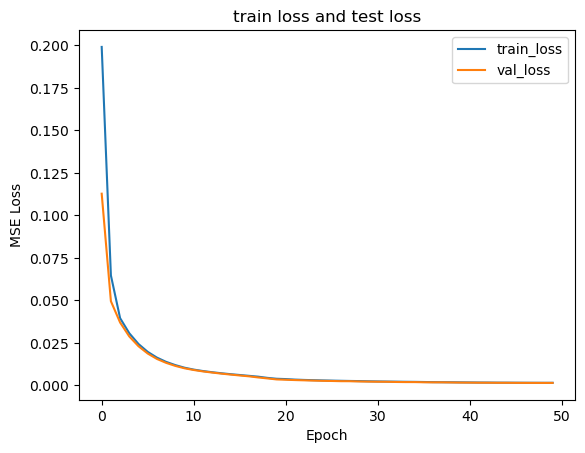

In [179]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, X_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    shuffle=True
)

# train process
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title("train loss and test loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()


In [180]:
X_train_pred = model.predict(X_train)
train_mse = np.mean(np.power(X_train - X_train_pred, 2), axis=(1,2))


threshold = np.percentile(train_mse, 95)
print("95%threshold:", threshold)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
95%threshold: 0.00491520416684855


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
outlier number: 19 / 493


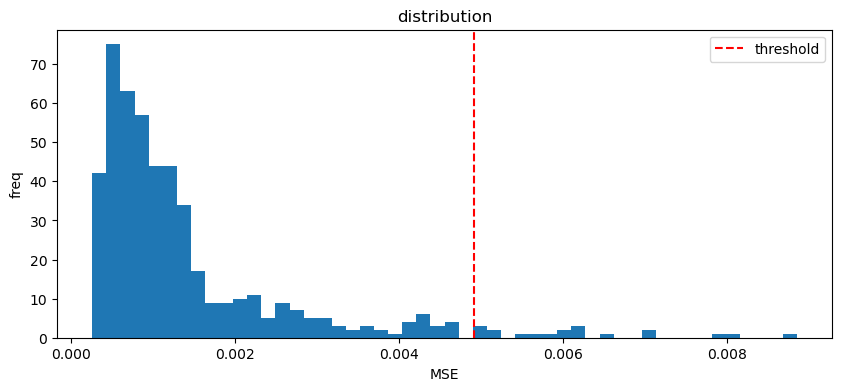

In [181]:
X_test_pred = model.predict(X_test)
test_mse = np.mean(np.power(X_test - X_test_pred, 2), axis=(1,2))

# outlier：MSE > threshold
anomalies = test_mse > threshold
print("outlier number:", np.sum(anomalies), "/", len(test_mse))

# visualization
plt.figure(figsize=(10,4))
plt.hist(test_mse, bins=50)
plt.axvline(threshold, color='r', linestyle='--', label='threshold')
plt.legend()
plt.title("distribution")
plt.xlabel("MSE")
plt.ylabel("freq")
plt.show()

In [186]:
anomaly_indices = [i for i, x in enumerate(anomalies) if x]
data_indexed = df.reset_index(drop=True)


outlier_indices = set()
for idx in anomaly_indices:
    outlier_indices.update(range(idx, idx + SEQ_LENGTH))


outliers = data_indexed.loc[list(outlier_indices)]
print("detected outliers:\n", outliers)

outlier_indices = sorted(list(outlier_indices))
df_clean = df.drop(index=outlier_indices).reset_index(drop=True)
df_clean.to_csv('merged_data.csv', index=False)
len(df_clean)
df = df_clean

detected outliers:
           Date         Close          High           Low          Open  \
59  2008-12-15   8564.530273   8676.280273   8469.030273   8628.809570   
60  2008-12-16   8924.139648   8958.790039   8565.650391   8565.650391   
61  2008-12-17   8824.339844   8961.259766   8778.070313   8921.910156   
62  2008-12-18   8604.990234   8883.360352   8527.410156   8823.940430   
63  2008-12-19   8579.110352   8787.230469   8550.429688   8606.500000   
..         ...           ...           ...           ...           ...   
504 2012-01-18  12578.950200  12582.280270  12453.200200  12474.690430   
505 2012-01-19  12623.980470  12625.799800  12563.580080  12578.190430   
506 2012-01-20  12720.480470  12720.480470  12620.759770  12623.830080   
507 2012-01-23  12708.820310  12764.490230  12665.830080  12720.250000   
508 2012-01-24  12675.750000  12708.519530  12613.540040  12708.370120   

        Volume  
59   229940000  
60   337190000  
61   239260000  
62   274080000  
63   5

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0103
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0171
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0088
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0033
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0026
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0027
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0034
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0049
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025
Epoch

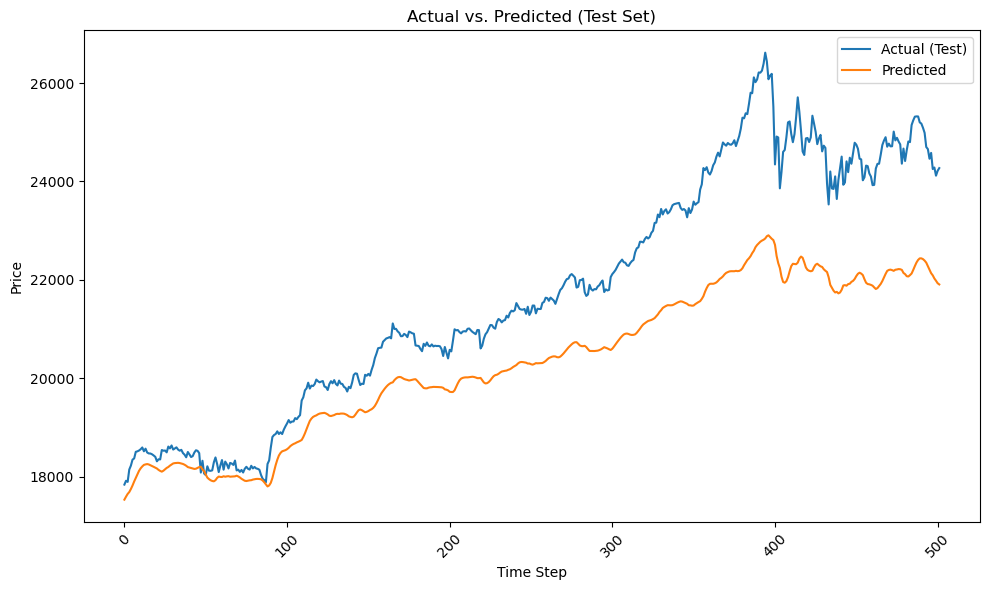

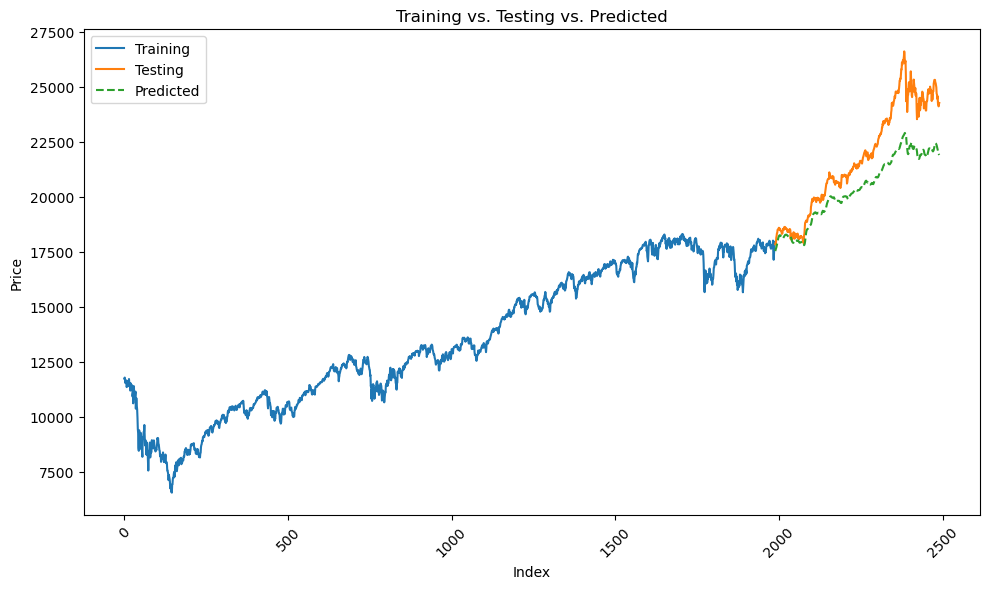

In [229]:
# === Main execution ===

# 2. Split into training and testing sets
train_size = int(round(len(df) * 0.799)-1)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# 3. Scale data
feature_col = 'Close'
window_size = 45
scaler = MinMaxScaler(feature_range=(0, 1))

train_values = train_data[feature_col].values.reshape(-1, 1)
train_scaled = scaler.fit_transform(train_values)

# 4. Create sequences
X_train, y_train = create_sequences(train_scaled, window_size)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# 5. Prepare test data without leakage
test_values = test_data[feature_col].values.reshape(-1, 1)
extended = np.vstack((train_values[-window_size:], test_values))
test_scaled = scaler.transform(extended)

X_test, y_test = create_sequences(test_scaled, window_size)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 6. Build and train model
model = build_model((window_size, 1))
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[early_stop], shuffle=False)

# 7. Predict and inverse scale
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# 8. Visualize
plot_results(test_data[feature_col].values, predictions,
             dates=test_data.get('Date'))
plot_combined(df, train_size, predictions)

In [230]:
mae = mean_absolute_error(actual_prices, predictions)
mse = mean_squared_error(actual_prices, predictions)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 1395.0527
MSE: 2800082.2161
RMSE: 1673.3446


In [165]:
def build_lstm_model(units=50, dropout=0.2, input_shape=(60, 1)):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

### Cross Validation Process

In [166]:
def train_and_evaluate(train_data, val_data, window_size, units, dropout, epochs, batch_size):
    """
    Train and evaluate the LSTM model on a single inner fold.
    Returns the validation MSE.
    """
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
    concat = np.concatenate([train_data[-window_size:], val_data])
    data_scaled = scaler.transform(concat.reshape(-1, 1))

    # Prepare training sequences
    X_train, y_train = [], []
    for i in range(window_size, len(train_scaled)):
        X_train.append(train_scaled[i-window_size:i, 0])
        y_train.append(train_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Prepare validation sequences
    X_val, y_val = [], []
    for i in range(window_size, len(data_scaled)):
        X_val.append(data_scaled[i-window_size:i, 0])
        y_val.append(data_scaled[i, 0])
    X_val, y_val = np.array(X_val), np.array(y_val)
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # Build and train model
    model = build_lstm_model(units=units, dropout=dropout, input_shape=(window_size, 1))
    early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
              verbose=0, callbacks=[early_stop], shuffle=False)

    # Predictions and inverse scaling
    val_pred = model.predict(X_val)
    val_pred_inv = scaler.inverse_transform(val_pred)
    y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Compute MSE
    mse = np.mean((val_pred_inv - y_val_inv) ** 2)
    return mse

In [167]:
def train_final_and_test(train_data, test_data, window_size, units, dropout, epochs, batch_size):
    """
    Train model on the outer training set and evaluate on the outer test set.
    Returns the test MSE.
    """
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data.reshape(-1, 1))

    # prepare training sequence
    X_train, y_train = [], []
    for i in range(window_size, len(train_scaled)):
        X_train.append(train_scaled[i-window_size:i, 0])
        y_train.append(train_scaled[i, 0])
    X_train = np.array(X_train).reshape(-1, window_size, 1)
    y_train = np.array(y_train)

    # expand test data and prepare to train sequence
    extended = np.concatenate([train_data[-window_size:], test_data])
    scaled = scaler.transform(extended.reshape(-1, 1))
    X_test, y_test = [], []
    for i in range(window_size, len(scaled)):
        X_test.append(scaled[i-window_size:i, 0])
        y_test.append(scaled[i, 0])
    X_test = np.array(X_test).reshape(-1, window_size, 1)
    y_test = np.array(y_test)

    # build and train the final model
    model = build_lstm_model(units=units, dropout=dropout, input_shape=(window_size, 1))
    model.fit(X_train, y_train,
              epochs=epochs, batch_size=batch_size,
              verbose=0)

    #predict and inverse transform
    pred = model.predict(X_test)
    pred_inv = scaler.inverse_transform(pred)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # calculate MSE
    mse = np.mean((pred_inv - y_test_inv) ** 2)
    return mse

In [168]:
def nested_time_series_cv(prices, outer_splits=10, inner_splits=2,
                          window_size=45, param_grid=None):
    """Nested CV for time series data with LSTM."""
    if param_grid is None:
        param_grid = [
            {'units': 50, 'dropout': 0.2, 'epochs': 15, 'batch_size': 32},
            {'units': 64, 'dropout': 0.3, 'epochs': 15, 'batch_size': 32},
            {'units': 50, 'dropout': 0.2, 'epochs': 30, 'batch_size': 16},
        ]
    outer_cv = TimeSeriesSplit(n_splits=outer_splits)
    outer_results = []

    for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(prices)):
        train_outer, test_outer = prices[train_idx], prices[test_idx]
        best_mse, best_params = float('inf'), None
        inner_cv = TimeSeriesSplit(n_splits=inner_splits)

        for params in param_grid:
            inner_mses = []
            for in_train_idx, in_val_idx in inner_cv.split(train_outer):
                mse_val = train_and_evaluate(
                    train_outer[in_train_idx], train_outer[in_val_idx],
                    window_size, **params
                )
                inner_mses.append(mse_val)
            mean_mse = np.mean(inner_mses)
            print(f"  Params={params}, InnerCV MSE={mean_mse:.6f}")
            if mean_mse < best_mse:
                best_mse, best_params = mean_mse, params

        print(f"  --> Best params on Outer Fold {fold_idx} = {best_params} (avg inner MSE={best_mse:.6f})")
        test_mse = train_final_and_test(
            train_outer, test_outer, window_size, **best_params
        )
        outer_results.append(test_mse)

    return outer_results

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
  Params={'units': 50, 'dropout': 0.2, 'epochs': 15, 'batch_size': 32}, InnerCV MSE=249636.454454
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
  Params={'units': 64, 'dropout': 0.3, 'epochs': 15, 'batch_size': 32}, InnerCV MSE=299504.088250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
  Params={'units': 50, 'dropout': 0.2, 'epochs': 30, 'batch_size': 16}, InnerCV MSE=200168.516663
  --> Best params on Outer Fold 0 = {'units': 50, 'dropout': 0.2, 'epochs': 30, 'batch_size': 16} (avg inner MSE=200168.516663)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
  Params={'units': 50, 'dropout': 0.2, 'epochs': 15, 'batch_size': 32}, InnerCV MSE=152651.362096
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
  Params={'units': 64, 'dropout': 0.3, 'epochs': 15, 'batch_si

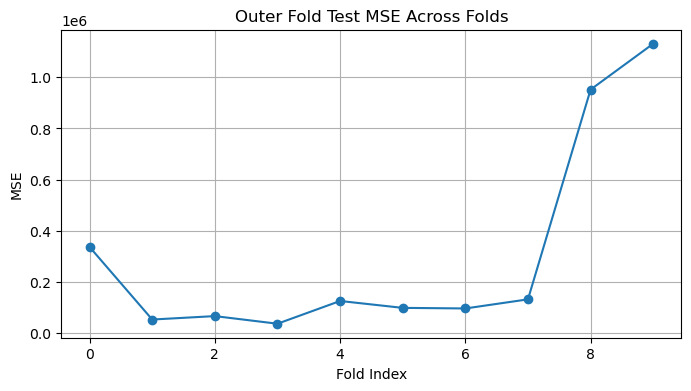

In [170]:
prices = df['Close'].values

param_grid = [
    {'units': 50, 'dropout': 0.2, 'epochs': 15, 'batch_size': 32},
    {'units': 64, 'dropout': 0.3, 'epochs': 15, 'batch_size': 32},
    {'units': 50, 'dropout': 0.2, 'epochs': 30, 'batch_size': 16},
]

results = nested_time_series_cv(
    prices,
    outer_splits=10,
    inner_splits=2,
    window_size=45,
    param_grid=param_grid
)

print("Outer fold test MSEs:", results)


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(results, marker='o', linestyle='-')
plt.title('Outer Fold Test MSE Across Folds')
plt.xlabel('Fold Index')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

# 5. Prescriptive Analysis

In [213]:
file_path = '/Users/xxxxswl/graduate programming/527/2ndpre/^DJI_historical_data_test-2.csv'
df_test = pd.read_csv(file_path, parse_dates=['Date'])
print(df_test.columns.tolist())


['Date', 'Close', 'High', 'Low', 'Open', 'Volume']


[LSTM] Final asset: $12944.44
[LSTM] maximum drawdown: $1207.45
[LSTM] Sharpe Ratio: 0.12
[SARIMA] Final asset: $0.00
[SARIMA] maximum drawdown: $10102.68
[SARIMA] Sharpe Ratio: nan


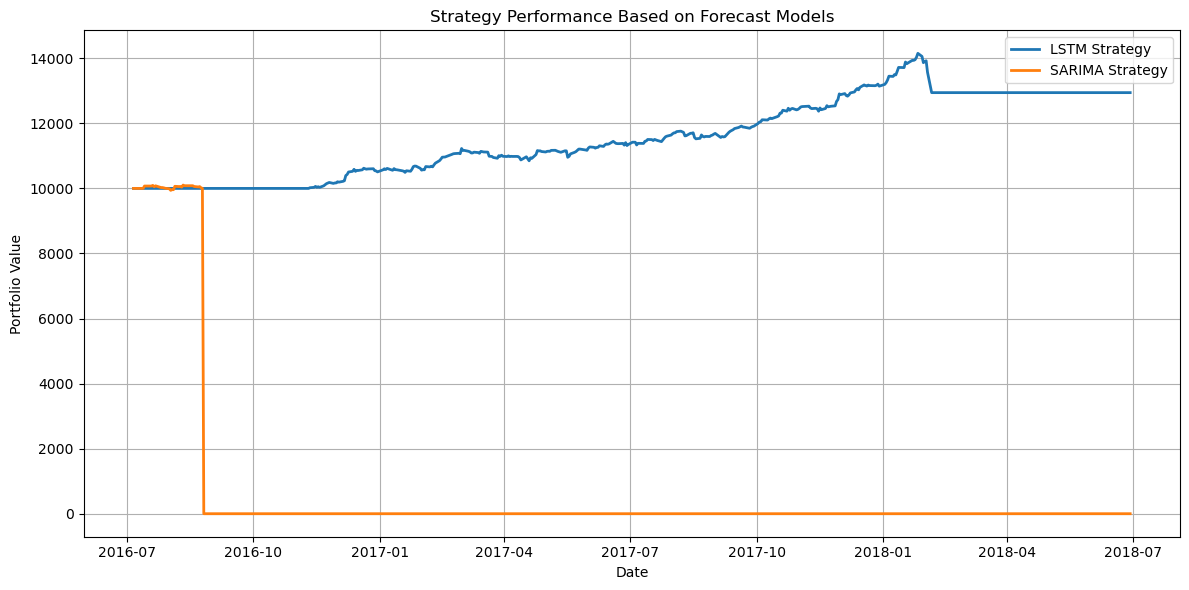

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

date_range = df_test['Date']

df_perf = pd.DataFrame({
    'Date': date_range,
    'Actual': actual_prices.values,
    'LSTM': predictions.flatten(),
    'SARIMA': predicted_prices_log.values
})

# === Strategy simulation function ===
initial_capital = 10000
threshold = 0.0072  # 0.72% increase or decrease serves as a buy or sell signal
risk_free_rate = 0.01  # Annualized risk-free interest rate (for Sharpe ratio)

def simulate_strategy(prices, predictions, threshold, name='Model'):
    capital = initial_capital
    position = 0
    capital_history = []

    for i in range(1, len(prices)):
        pred_change = (predictions[i] - predictions[i - 1]) / predictions[i - 1]
        if pred_change > threshold:
            position = capital / prices[i - 1]
            capital = 0
        elif pred_change < -threshold:
            capital += position * prices[i - 1]
            position = 0

        total_value = capital + position * prices[i]
        capital_history.append(total_value)

    capital_history = np.array(capital_history)
    returns = np.diff(capital_history) / capital_history[:-1]

    # evaluation index
    max_drawdown = np.max(np.maximum.accumulate(capital_history) - capital_history)
    sharpe_ratio = (np.mean(returns) - risk_free_rate / 252) / (np.std(returns) + 1e-8)

    print(f'[{name}] Final asset: ${capital_history[-1]:.2f}')
    print(f'[{name}] maximum drawdown: ${max_drawdown:.2f}')
    print(f'[{name}] Sharpe Ratio: {sharpe_ratio:.2f}')

    return capital_history

# Execution strategy simulation
lstm_capital = simulate_strategy(df_perf['Actual'].values, df_perf['LSTM'].values, threshold, name='LSTM')
sarima_capital = simulate_strategy(df_perf['Actual'].values, df_perf['SARIMA'].values, threshold, name='SARIMA')

# Plotting: Cumulative Asset curve 
plt.figure(figsize=(12,6))
plt.plot(df_perf['Date'].values[1:], lstm_capital, label='LSTM Strategy', linewidth=2)
plt.plot(df_perf['Date'].values[1:], sarima_capital, label='SARIMA Strategy', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Strategy Performance Based on Forecast Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **Prescriptive Analysis for Stock Prediction Models (LSTM & SARIMA)**

#### **1. LSTM model analysis**

* **Final asset**：\$12944.44
* **Max drawdown**：\$1207.45
* **Sharpe Ratio**：0.12

**Advantage**：

* The LSTM model demonstrated a certain level of profitability and successfully achieved a return of \$2944.44 from the initial capital.
* Compared with other models, LSTM can handle complex nonlinear relationships and adapt to changes in the market.

**Suggestion**：

1. **Reduce Risks** : Introduce stop-loss and take-profit mechanisms, such as setting a stop-loss of 2% and a take-profit of 5%.
2. **Enhance the Sharpe ratio** : Improve the risk-adjusted return by optimizing model parameters or introducing more features (such as technical indicators).

#### **2. SARIMA model analysis**

* **Final asset**: \$0.00
* **Maximum drawdown** : \$10,102.68
* **Sharpe Ratio** : 'nan'

**Advantage**：

* SARIMA is a traditional time series prediction method, suitable for capturing seasonal and trend changes. For stock market data with strong periodicity, it can provide an effective benchmark.

**Suggestion**：

1. **Optimize the model** : Adjust the 'p', 'd', and 'q' parameters of SARIMA, or try to use SARIMAX to add external features (such as technical indicators).
2. **Optimize threshold** : Reduce the trigger threshold of trading signals to increase trading frequency and avoid untriggered transactions.
3. **Drawdown Control** : Incorporate stop-loss strategies to reduce losses and prevent excessive losses.


#### **3. Overall optimization suggestions**

* **Model combination**: By integrating the advantages of LSTM and SARIMA, the prediction accuracy can be enhanced through weighted averaging or model fusion.
* **Dynamic Threshold Adjustment** : Dynamically adjust the trading threshold based on market volatility. When the volatility is significant, lower the threshold to increase the trading frequency.


# 6. Conclusion


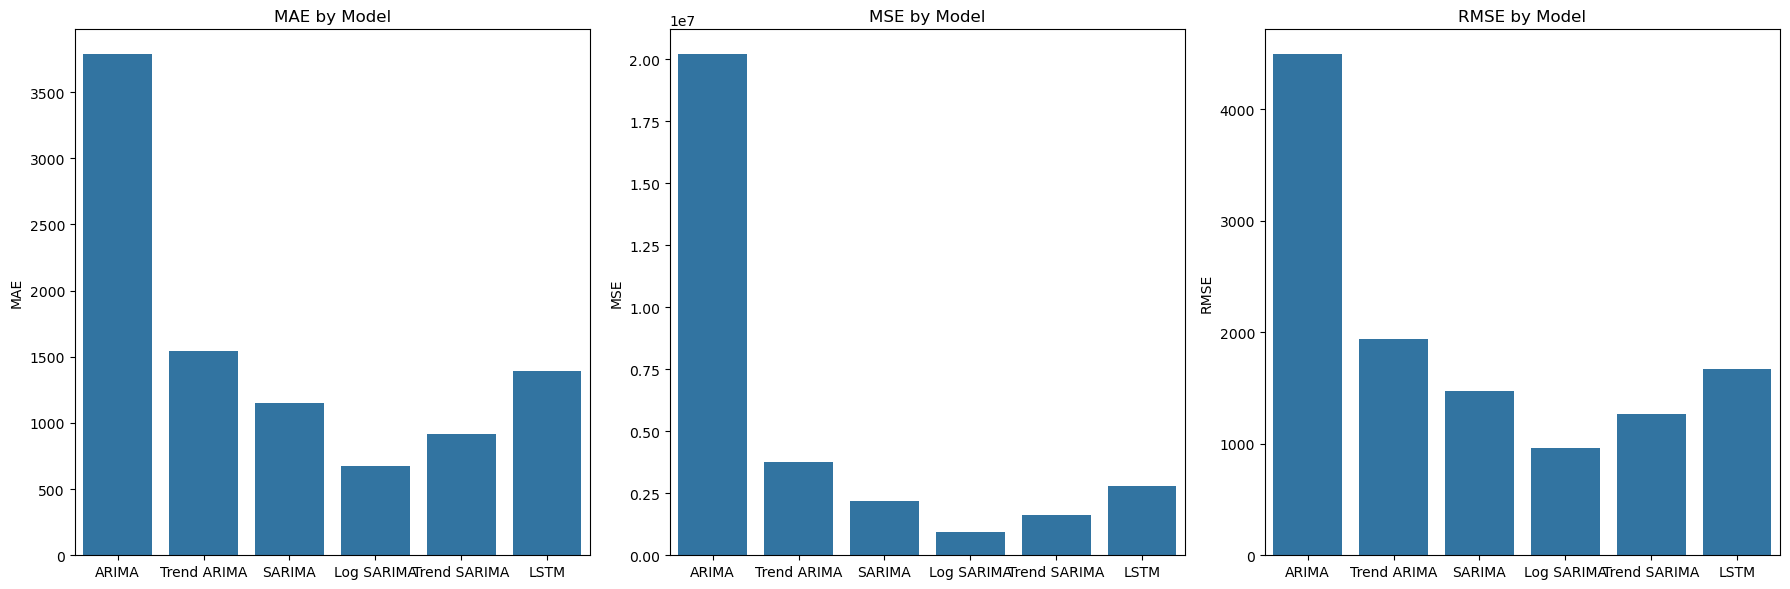

,Model,MAE,MSE,RMSE
0,ARIMA,3784.78,20195244.84,4493.91
1,Trend ARIMA,1545.31,3758096.52,1938.58
2,SARIMA,1153.08,2168789.24,1472.68
3,Log SARIMA,677.88,925609.85,962.09
4,Trend SARIMA,913.63,1612616.86,1269.89
5,LSTM,1395.05,2800082.22,1673.34


In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "Model": ["ARIMA", "Trend ARIMA", "SARIMA", "Log SARIMA", "Trend SARIMA", "LSTM"],
    "MAE": [3784.78, 1545.31, 1153.08, 677.88, 913.63, 1395.05],
    "MSE": [20195244.84, 3758096.52, 2168789.24, 925609.85, 1612616.86, 2800082.22],
    "RMSE": [4493.91, 1938.58, 1472.68, 962.09, 1269.89, 1673.34]
}

dt = pd.DataFrame(data)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
metrics = ['MAE', 'MSE', 'RMSE']

for i, metric in enumerate(metrics):
    sns.barplot(x="Model", y=metric, data=dt, ax=axes[i])
    axes[i].set_title(f"{metric} by Model")
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel("")

plt.tight_layout()
plt.show()

dt

1. Through the values of each item in the table and the plot diagrams of the three indicators, it can be concluded that if one wants to predict the data with the minimum error, log sarima should be chosen.
2. However, combined with the results of the normative analysis, LSTM has demonstrated profit potential under the current strategy, despite its relatively low Sharpe ratio. The SARIMA model needs to be further tuned and combined with more external features or improved threshold Settings.
3. The Log SARIMA model is more suitable for prediction tasks that pursue stability and low error.
4. The LSTM model is more suitable for application in scenarios that require decision-driven, such as stock trading strategies, because it can capture nonlinear characteristics and trend changes in time series.
5. Meanwhile, combining the two models may enhance the predictive ability, reduce risks and optimize returns.

# References

1. Box, G. E., & Jenkins, G. M. (1976). *Time Series Analysis: Forecasting and Control*. San Francisco: Holden-Day.

2. Hyndman, R. J., & Athanasopoulos, G. (2018). *Forecasting: Principles and Practice*. OTexts.

3. Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). Learning representations by backpropagating errors. *Nature*, 323(6088), 533–536.

4. Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press.

5. Zhang, G., Patuwo, B. E., & Hu, M. Y. (1998). Forecasting with artificial neural networks: The state of the art. *International Journal of Forecasting*, 14(1), 35–62.

6. Kumar, M., & Gupta, R. (2016). Stock market prediction using machine learning algorithms: A survey. *Proceedings of the International Conference on Communication and Computing Systems (ICCCS)*.
CCS).

In [238]:
from IPython import get_ipython

def count_executed_code_lines():
    cells = get_ipython().user_ns['In']
    total_lines = 0
    for cell in cells:
        lines = cell.strip().splitlines()
        for line in lines:
            stripped = line.strip()
            if stripped and not stripped.startswith("#"):
                total_lines += 1
    return total_lines

print(f"有效代码行数（不含注释与空行）: {count_executed_code_lines()}")



有效代码行数（不含注释与空行）: 5166
